# Advanced Classification

Task: binary class classification 
* Class 0 -> LAYING STANDING SITTING WALKING  WALKING_DOWNSTAIRS
* Class 1 -> WALKING_UPSTAIRS

#### Importing libraries

In [154]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay, plot_precision_recall_curve

#### Load Train nooutlier ----> Transform in Train binary nooutlier & Load Test binary

In [123]:
#df_train = pd.read_csv('csv/train_nooutlier.csv')
#df_train['Class'] = 0
#df_train.loc[(df_train['Activity']==2), 'Class'] = 1
#df_train.drop(['Activity'], axis = 1)
#df_train.shape

In [124]:
#df_test = pd.read_csv('csv/test_binary.csv')
#df_test['Class'] = 0
#df_test.loc[(df_test['Activity']==2), 'Class'] = 1
#df_test.drop(['Activity'], axis = 1)
#df_test.shape

In [125]:
df_train = pd.read_csv('csv/train_binary.csv')
df_test = pd.read_csv('csv/test_binary.csv')

In [126]:
df_train['Class'] = 0
df_test['Class'] = 0

df_train.loc[(df_train['Activity']==2), 'Class'] = 1
df_test.loc[(df_test['Activity']==2), 'Class'] = 1

#### Data partitioning 

In [127]:
X_train = df_train.drop(['subject','Activity','ActivityName','Class'], axis = 1)
y_train = df_train.Class
X_test = df_test.drop(['subject','Activity','ActivityName','Class'], axis = 1)
y_test = df_test.Class

In [128]:
y_train.value_counts()

0    6279
1    1073
Name: Class, dtype: int64

In [129]:
#X_train = df_train_binary.drop(['subject','Activity','ActivityName','Class'], axis = 1)
#y_train = df_train_binary.Class
#X_test = df_test_binary.drop(['subject','Activity','ActivityName','Class'], axis = 1)
#y_test = df_test_binary.Class

In [130]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [131]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7352, 561)
(7352,)
(2947, 561)
(2947,)


# Naive Bayes

In [132]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [133]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

GaussianNB()

In [134]:
y_pred = clf_nb.predict(X_test)

In [135]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7692568713946386
F1-score [0.84089846 0.58024691]
              precision    recall  f1-score   support

           0       1.00      0.73      0.84      2476
           1       0.41      1.00      0.58       471

    accuracy                           0.77      2947
   macro avg       0.70      0.86      0.71      2947
weighted avg       0.91      0.77      0.80      2947



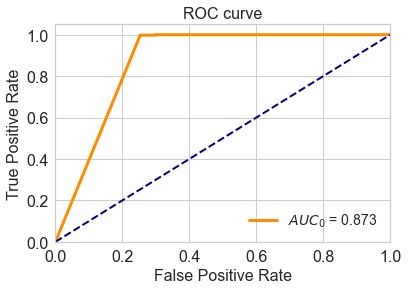

In [149]:
y_score = clf_nb.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [150]:
import scikitplot as skplt

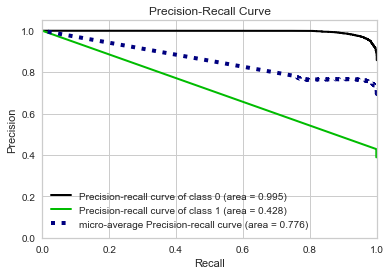

In [151]:
skplt.metrics.plot_precision_recall(y_test, y_score)
plt.show()

In [145]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

In [146]:
prc_auc = auc(recall, precision)
prc_auc

0.0861259793061487

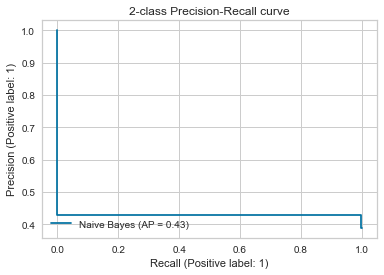

In [148]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_score[:,1], name="Naive Bayes")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [ ]:
# No use of smoothing parameter because no missing values (= no zero probability)

In [162]:
from imblearn.over_sampling import RandomOverSampler

In [163]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 6279, 1: 6279})


In [164]:
clf_nb_b = GaussianNB()
clf_nb_b.fit(X_res, y_res)

GaussianNB()

In [165]:
y_pred_b = clf_nb_b.predict(X_test)

In [166]:
print('Accuracy %s' % accuracy_score(y_test, y_pred_b))
print('F1-score %s' % f1_score(y_test, y_pred_b, average=None))
print(classification_report(y_test, y_pred_b))

Accuracy 0.7678995588734306
F1-score [0.83981265 0.57881773]
              precision    recall  f1-score   support

           0       1.00      0.72      0.84      2476
           1       0.41      1.00      0.58       471

    accuracy                           0.77      2947
   macro avg       0.70      0.86      0.71      2947
weighted avg       0.90      0.77      0.80      2947



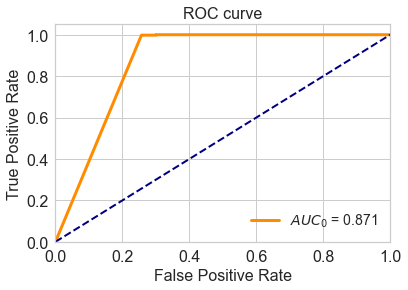

In [167]:
y_score = clf_nb_b.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [133]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

GaussianNB()

In [134]:
y_pred = clf_nb.predict(X_test)

In [135]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7692568713946386
F1-score [0.84089846 0.58024691]
              precision    recall  f1-score   support

           0       1.00      0.73      0.84      2476
           1       0.41      1.00      0.58       471

    accuracy                           0.77      2947
   macro avg       0.70      0.86      0.71      2947
weighted avg       0.91      0.77      0.80      2947



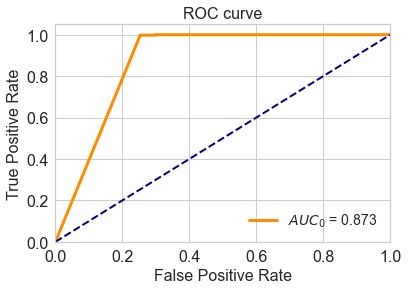

In [149]:
y_score = clf_nb.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
y_score = clf.predict_proba(X_test_rsp)
fpr, tpr, _ = roc_curve(y_t, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

In [150]:
import scikitplot as skplt

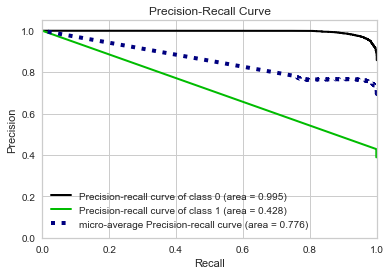

In [151]:
skplt.metrics.plot_precision_recall(y_test, y_score)
plt.show()

# Linear Regression

In [10]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [11]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [30]:
from sklearn.decomposition import FactorAnalysis

In [13]:
!pip install factor-analyzer

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=3e8eeef2b4d5e2228c7a864c99d7fef60ac93966009b4b67e2c5d3e02b67cdee
  Stored in directory: c:\users\cosimo\appdata\local\pip\cache\wheels\00\cf\ea\83feab47e1d682730be5935c52a2647f49adfb393e948d4bf5
Successfully built factor-analyzer


You should consider upgrading via the 'C:\Users\Cosimo\anaconda3\python.exe -m pip install --upgrade pip' command.


In [13]:
from factor_analyzer.factor_analyzer import FactorAnalyzer

In [14]:
fa = FactorAnalyzer(rotation='varimax')
fa.fit(X_train)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [15]:
ev, v = fa.get_eigenvalues()

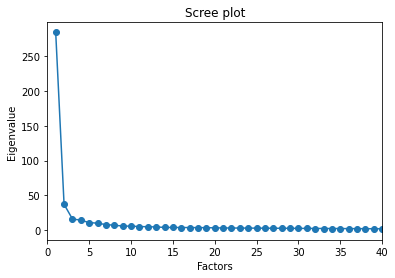

In [16]:
plt.scatter(range(1,X_train.shape[1]+1), ev)
plt.plot(range(1,X_train.shape[1]+1), ev)
plt.title('Scree plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.xlim(0,40)
plt.show()

In [17]:
np.count_nonzero(ev[(np.where(ev>1))])

61

In [31]:
# Factor analysis
transformer = FactorAnalysis(n_components=61, random_state=0)
X_transformed = transformer.fit(X_train)
X_train_transformed = X_transformed.transform(X_train)
X_test_transformed = X_transformed.transform(X_test)

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_transformed, y_train)

LinearRegression()

In [24]:
print('Coefficients: \n', lin_reg.coef_)
print('Intercept: \n', lin_reg.intercept_)

Coefficients: 
 [ 0.12332077 -0.11801175  0.11275826  0.06066988 -0.07938748  0.01818101
  0.0210675  -0.06326837  0.03987388  0.02002906  0.04016489  0.00820641
  0.02946806 -0.00780838  0.01083526 -0.01374597  0.02866446 -0.01473504
  0.01672653 -0.01327187  0.00210441 -0.00585841  0.07030276 -0.02260894
  0.03244747 -0.04415188  0.00600947 -0.02528402  0.00364809  0.00971609
 -0.01048022  0.02313441  0.02869372  0.00060444 -0.02557575 -0.00038892
  0.01749239 -0.01354539 -0.02557778  0.02031092  0.00887307 -0.00266658
 -0.00965485 -0.07080351  0.03394915 -0.04135227  0.00143733 -0.04547993
 -0.00513797 -0.020642    0.0132006   0.02061625 -0.01479765  0.00756507
 -0.00145624  0.00976369  0.02300515  0.01578294  0.01564853  0.03139454
  0.00288696]
Intercept: 
 0.14594668117519013


In [25]:
y_pred = lin_reg.predict(X_test_transformed)

In [26]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.635
MSE: 0.049
MAE: 0.148


#### Linear Regression in 2 dimensions

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_train.T[0].values.reshape(-1,1), X_train.T[1].values.reshape(-1,1))
y_pred = lin_reg.predict(X_test.T[0].values.reshape(-1,1)).reshape(1,-1)[0]

In [21]:
y_test.shape

(2947,)

In [22]:
y_pred.shape

(561,)

In [23]:
#lin_reg = LinearRegression()
#lin_reg.fit(X_train[:,[0]], X_train[:,[1]])
#y_pred = lin_reg.predict(X_test[:,[0]]).reshape(-1,1)[0]
#
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

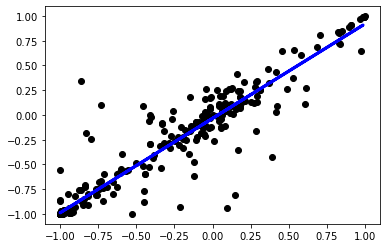

In [24]:
plt.scatter(X_train.T[0], X_train.T[1],  color='black')
plt.plot(X_test.T[0], y_pred, color='blue', linewidth=3, label='test')
plt.show()

#### Lasso

In [30]:
lin_reg_lasso = Lasso()
lin_reg_lasso.fit(X_train_transformed, y_train)
print('Coefficients: \n', lin_reg_lasso.coef_)
print('Intercept: \n', lin_reg_lasso.intercept_)

Coefficients: 
 [ 0. -0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0.  0. -0.  0. -0.
  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0.
  0. -0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0. -0. -0.  0.  0. -0.  0.
 -0.  0.  0.  0.  0.  0.  0.]
Intercept: 
 0.1459466811751904


In [31]:
y_pred = lin_reg_lasso.predict(X_test_transformed)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.001
MSE: 0.134
MAE: 0.259


#### Ridge

In [32]:
lin_reg_ridge = Ridge()
lin_reg_ridge.fit(X_train_transformed, y_train)
print('Coefficients: \n', lin_reg_ridge.coef_)
print('Intercept: \n', lin_reg_ridge.intercept_)

Coefficients: 
 [ 0.123304   -0.1179957   0.11274292  0.06066163 -0.07937669  0.01817854
  0.02106463 -0.06325976  0.03986846  0.02002633  0.04015943  0.0082053
  0.02946405 -0.00780732  0.01083379 -0.0137441   0.02866056 -0.01473304
  0.01672426 -0.01327007  0.00210413 -0.00585761  0.07029319 -0.02260587
  0.03244306 -0.04414587  0.00600866 -0.02528058  0.0036476   0.00971477
 -0.01047879  0.02313126  0.02868981  0.00060436 -0.02557227 -0.00038887
  0.01749001 -0.01354354 -0.0255743   0.02030815  0.00887186 -0.00266621
 -0.00965354 -0.07079384  0.03394451 -0.0413466   0.00143714 -0.04547367
 -0.00513726 -0.02063914  0.01319877  0.02061337 -0.01479558  0.00756401
 -0.00145603  0.00976232  0.02300189  0.01578068  0.01564626  0.03138997
  0.00288654]
Intercept: 
 0.14594668117519013


In [33]:
y_pred = lin_reg_ridge.predict(X_test_transformed)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.635
MSE: 0.049
MAE: 0.148


#### Linear regression alternativa

#### Univariate problem

In [11]:
X_train_reg = X_train.iloc[:,[0]].values # Indipendent variable: tBodyAcc-mean()-X, Length: 7352, dtype: float64
X_test_reg = X_test.iloc[:,[0]].values

y_train_reg = X_train.iloc[:,[1]].values # Dependent variable: tBodyAcc-mean()-Y, Length: 2947, dtype: float64
y_test_reg = X_test.iloc[:,[1]].values

<AxesSubplot:xlabel='tBodyAcc-mean()-X', ylabel='tBodyAcc-mean()-Y'>

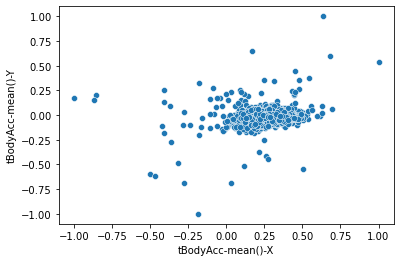

In [14]:
sns.scatterplot(data=X_train, x="tBodyAcc-mean()-X", y="tBodyAcc-mean()-Y")

In [21]:
# Linear regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

regr = LinearRegression()

regr.fit(X=X_train_reg, y = y_train_reg)

y_pred = regr.predict(X_test_reg).reshape(1,-1)[0]

In [22]:
print('R2: %.3f' % r2_score(y_test_reg, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test_reg, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test_reg, y_pred))

R2: -0.024
MSE: 0.001
MAE: 0.015


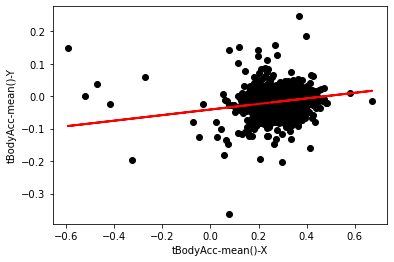

In [24]:
plt.scatter(X_test_reg, y_test_reg, color='black')
plt.plot(X_test_reg, y_pred, color='red', linewidth=2, label='test')
plt.xlabel('tBodyAcc-mean()-X')
plt.ylabel('tBodyAcc-mean()-Y')
plt.show()

#### Multivariate problem

In [60]:
X_test.iloc[:,[0]].columns

Index(['tBodyAcc-mean()-X'], dtype='object')

In [62]:
attributes = [col for col in X_train.columns if col != 'tBodyAcc-mean()-X']

X_train_multi = X_train[attributes].values
y_train_multi = X_train['tBodyAcc-mean()-X'].values

X_test_multi = X_test[attributes].values
y_test_multi = X_test['tBodyAcc-mean()-X'].values

In [63]:
# Linear regression
lin_reg_multi = LinearRegression()
lin_reg_multi.fit(X_train_multi,y_train_multi)

LinearRegression()

In [64]:
y_pred = lin_reg_multi.predict(X_test_multi)

In [65]:
print('R2: %.3f' % r2_score(y_test_multi, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test_multi, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test_multi, y_pred))

R2: 0.703
MSE: 0.001
MAE: 0.024


In [66]:
# Lasso 
reg = Lasso()
reg.fit(X_train_multi,y_train_multi)

Lasso()

In [67]:
y_pred = reg.predict(X_test_multi)

print('R2: %.3f' % r2_score(y_test_multi, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test_multi, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test_multi, y_pred))

R2: -0.000
MSE: 0.004
MAE: 0.033


In [68]:
# Ridge
reg = Ridge()
reg.fit(X_train_multi,y_train_multi)

Ridge()

In [69]:
y_pred = reg.predict(X_test_multi)

print('R2: %.3f' % r2_score(y_test_multi, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test_multi, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test_multi, y_pred))

R2: 0.698
MSE: 0.001
MAE: 0.024


In [71]:
# Gradient Boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train_multi, y_train_multi)

GradientBoostingRegressor(random_state=0)

In [72]:
y_pred = reg.predict(X_test_multi)

In [73]:
print('R2: %.3f' % r2_score(y_test_multi, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test_multi, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test_multi, y_pred))

R2: 0.842
MSE: 0.001
MAE: 0.014


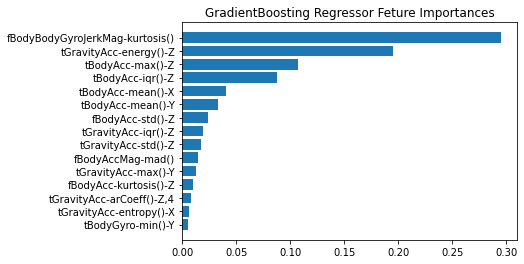

In [74]:
nbr_features = 15

gb_feature_importances = reg.feature_importances_ 
sorted_idx = gb_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, gb_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train.columns)[sorted_idx])
plt.title("GradientBoosting Regressor Feture Importances")
plt.show()

#### Simple Linear Regression definitiva

In [175]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [76]:
# from dataframe to array
X_train_r = pd.DataFrame(X_train).to_numpy()
y_train_r = pd.DataFrame(y_train).to_numpy()
X_test_r = pd.DataFrame(X_test).to_numpy()
y_test_r = pd.DataFrame(y_test).to_numpy()

In [17]:
reg = LinearRegression()
reg.fit(X_train_r.T[0].reshape(-1,1), X_train_r.T[1].reshape(-1,1))
y_pred = reg.predict(X_test_r.T[0].reshape(-1, 1)).reshape(1,-1)[0]

print('R2: %.3f' % r2_score(y_test_r, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test_r, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test_r, y_pred))

R2: -0.237
MSE: 0.166
MAE: 0.178


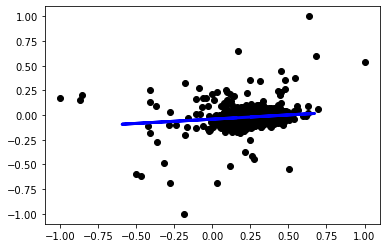

In [18]:
plt.scatter(X_train_r.T[0].reshape(-1,1), X_train_r.T[1].reshape(-1,1),  color='black')
plt.plot(X_test_r.T[0], y_pred, color='blue', linewidth=3, label='test')
plt.xlabel('')
plt.show()

# Logistic Regression

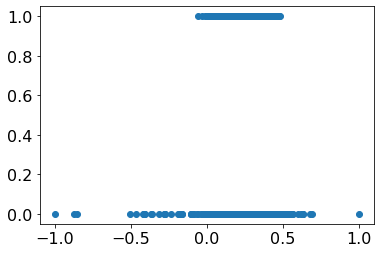

In [19]:
plt.scatter(X_train.T.iloc[0], y_train)
#plt.xlabel(selected_columns[0], fontsize=16)
#plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [128]:
clf_log_reg = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000) # without solver='lbfgs', max_iter=1000 raise error
clf_log_reg.fit(X_train.T.iloc[1].values.reshape(-1,1), y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [129]:
y_pred = clf_log_reg.predict(X_test.T.iloc[1].values.reshape(-1,1)) # X_test.T.iloc[0].values.reshape(-1,1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.840176450627757
F1-score [0.9131477 0.       ]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2476
           1       0.00      0.00      0.00       471

    accuracy                           0.84      2947
   macro avg       0.42      0.50      0.46      2947
weighted avg       0.71      0.84      0.77      2947



C:\Users\Cosimo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cosimo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cosimo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
from scipy.special import expit

#### Logistic regression (alternative with LogisticRegressionCV)

In [176]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

In [78]:
scaler = StandardScaler()
X_train_log = scaler.fit_transform(X_train)
X_test_log = scaler.fit_transform (X_test)

In [79]:
logistic = LogisticRegressionCV(cv=10, verbose = 0, scoring = 'accuracy')
logistic.fit(X_train_log, y_train)

C:\Users\Cosimo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Cosimo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Cosimo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Cosimo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Cosimo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Cosimo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Cosimo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Cosimo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

LogisticRegressionCV(cv=10, scoring='accuracy')

In [82]:
from scipy.special import expit

In [95]:
loss = expit(sorted(np.dot(X_test_log, np.transpose(logistic.coef_))) + logistic.intercept_).ravel()
plt.figure(figsize=(10,10))
plt.plot(sorted(X_test_log[:,2]), loss, color='red', linewidth=2)
plt.scatter(X_train_log[:,2], y_train)
plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

NameError: name 'logistic' is not defined

In [128]:
y_pred = logistic.predict(X_test_log)
print('Accuracy %s' % accuracy_score(y_test, y_pred))

Accuracy 0.9813369528333898


#### Alternative Logistic regression ()

In [209]:
from scipy.special import expit
from sklearn.preprocessing import StandardScaler

In [210]:
scaler = StandardScaler()
X_train_log = scaler.fit_transform(X_train)
X_test_log = scaler.fit_transform (X_test)

In [211]:
clf_2 = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000) # without solver='lbfgs', max_iter=1000 raise error
clf_2.fit(X_train_log, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [212]:
y_pred = clf_2.predict(X_test_log)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9803189684424839
F1-score [0.98838606 0.93555556]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2476
           1       0.98      0.89      0.94       471

    accuracy                           0.98      2947
   macro avg       0.98      0.95      0.96      2947
weighted avg       0.98      0.98      0.98      2947



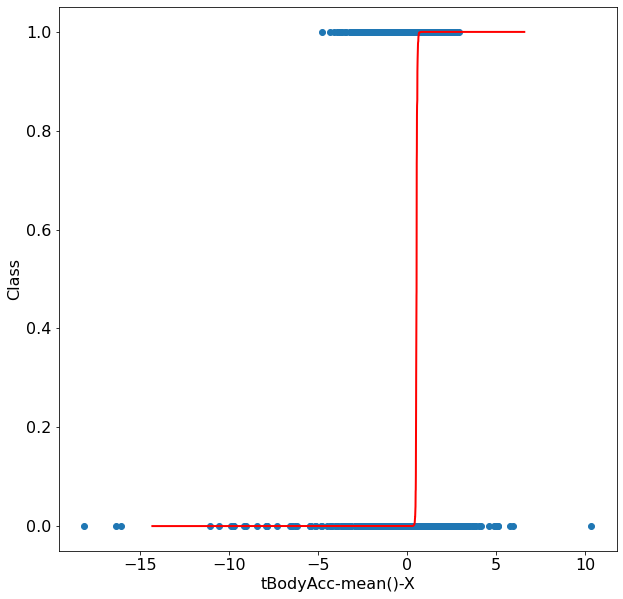

In [207]:
# Test
loss = expit(sorted(np.dot(X_test_log, np.transpose(clf_2.coef_))) + clf_2.intercept_).ravel()
plt.figure(figsize=(10,10))
plt.plot(sorted(X_test_log[:,0]), loss, color='red', linewidth=2)
plt.scatter(X_train_log[:,0], y_train)
plt.xlabel('tBodyAcc-mean()-X', fontsize=16)
plt.ylabel('Class', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

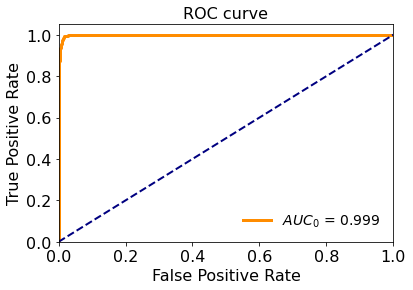

In [213]:
y_score = clf_2.predict_proba(X_test_log)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [214]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

In [215]:
prc_auc = auc(recall, precision)
prc_auc

0.9826038152503211

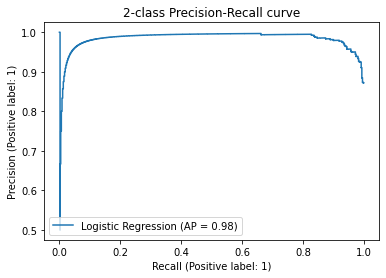

In [216]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_score[:,1], name="Logistic Regression")
_ = display.ax_.set_title("2-class Precision-Recall curve")

#### Logistic Regression ufficiale with Indipendent variable: tBodyAcc-mean()-X

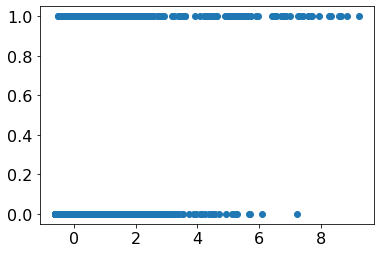

In [89]:
# Indipendent variable: tBodyAcc-mean()-X, Length: 7352, dtype: float64
# 553
plt.scatter(X_train_r.T[500], y_train_r.ravel())
#plt.xlabel(selected_columns[0], fontsize=16)
#plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [90]:
clf_log_reg = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000) # without solver='lbfgs', max_iter=1000 raise error
clf_log_reg.fit(X_train_r.T[500].reshape(-1,1), y_train_r.ravel())

LogisticRegression(max_iter=1000, random_state=0)

In [91]:
y_pred = clf_log_reg.predict(X_test_r.T[500].reshape(-1,1)) # X_test.T.iloc[0].values.reshape(-1,1)

print('Accuracy %s' % accuracy_score(y_test_r, y_pred))
print('F1-score %s' % f1_score(y_test_r, y_pred, average=None))
print(classification_report(y_test_r, y_pred))

Accuracy 0.8445877163216831
F1-score [0.91355228 0.23154362]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      2476
           1       0.55      0.15      0.23       471

    accuracy                           0.84      2947
   macro avg       0.70      0.56      0.57      2947
weighted avg       0.81      0.84      0.80      2947



In [81]:
from scipy.special import expit

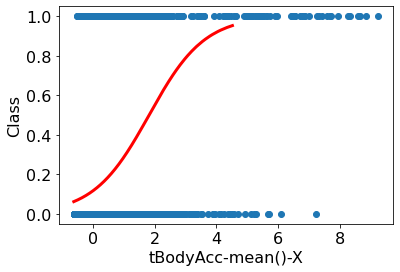

In [92]:
loss = expit(sorted(X_test_r.T[500].reshape(-1,1)) * clf_log_reg.coef_ + clf_log_reg.intercept_).ravel()
plt.plot(sorted(X_test_r.T[500].reshape(-1,1)), loss, color='red', linewidth=3)
plt.scatter(X_train_r.T[500].reshape(-1,1), y_train_r)
plt.xlabel('tBodyAcc-mean()-X', fontsize=16)
plt.ylabel('Class', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

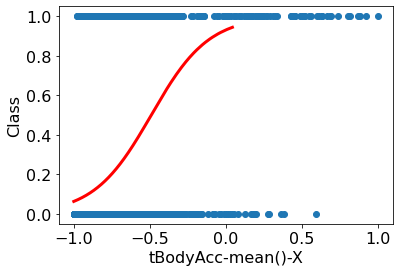

In [70]:
loss = expit(sorted(X_test_r.T[500].reshape(-1,1)) * clf_log_reg.coef_ + clf_log_reg.intercept_).ravel()
plt.plot(sorted(X_test_r.T[500].reshape(-1,1)), loss, color='red', linewidth=3)
plt.scatter(X_train_r.T[500].reshape(-1,1), y_train_r)
plt.xlabel('tBodyAcc-mean()-X', fontsize=16)
plt.ylabel('Class', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

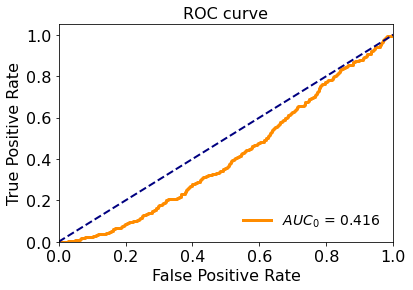

In [66]:
y_score = clf_log_reg.predict_proba(X_test_r.T[553].reshape(-1,1))
fpr0, tpr0, _ = roc_curve(y_test_r, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [67]:
precision, recall, thresholds = precision_recall_curve(y_test_r, y_score[:,1])

In [68]:
prc_auc = auc(recall, precision)
prc_auc

0.1262997268430882

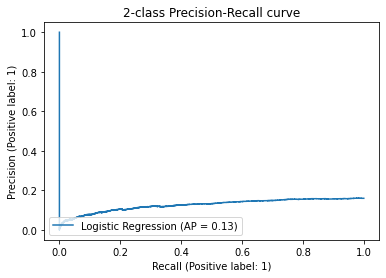

In [69]:
display = PrecisionRecallDisplay.from_predictions(y_test_r, y_score[:,1], name="Logistic Regression")
_ = display.ax_.set_title("2-class Precision-Recall curve")

#### Balanced Logistic regression

In [171]:
X_train_r = pd.DataFrame(X_train).to_numpy()
y_train_r = pd.DataFrame(y_train).to_numpy()
X_test_r = pd.DataFrame(X_test).to_numpy()
y_test_r = pd.DataFrame(y_test).to_numpy()

In [172]:
from imblearn.over_sampling import RandomOverSampler

In [173]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_r, y_train_r)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 6279, 1: 6279})


In [179]:
clf_log_reg_b = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000) # without solver='lbfgs', max_iter=1000 raise error
clf_log_reg_b.fit(X_res.T[500].reshape(-1,1), y_res.ravel())

LogisticRegression(max_iter=1000, random_state=0)

In [181]:
y_pred = clf_log_reg_b.predict(X_test_r.T[500].reshape(-1,1)) # X_test.T.iloc[0].values.reshape(-1,1)

print('Accuracy %s' % accuracy_score(y_test_r, y_pred))
print('F1-score %s' % f1_score(y_test_r, y_pred, average=None))
print(classification_report(y_test_r, y_pred))

Accuracy 0.7930098405157787
F1-score [0.86657918 0.53857791]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      2476
           1       0.42      0.76      0.54       471

    accuracy                           0.79      2947
   macro avg       0.68      0.78      0.70      2947
weighted avg       0.86      0.79      0.81      2947



In [182]:
from scipy.special import expit

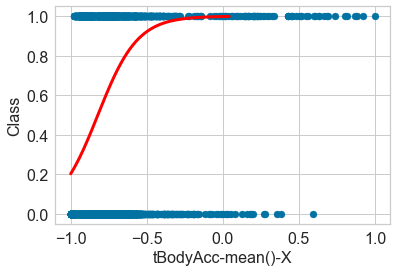

In [186]:
loss = expit(sorted(X_test_r.T[500].reshape(-1,1)) * clf_log_reg_b.coef_ + clf_log_reg_b.intercept_).ravel()
plt.plot(sorted(X_test_r.T[500].reshape(-1,1)), loss, color='red', linewidth=3)
plt.scatter(X_train_r.T[500].reshape(-1,1), y_train_r)
plt.xlabel('tBodyAcc-mean()-X', fontsize=16)
plt.ylabel('Class', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

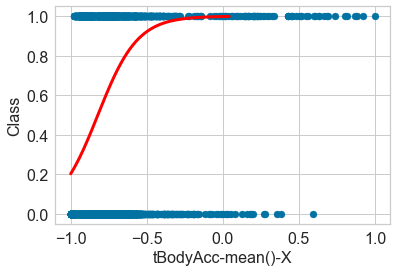

In [190]:
loss = expit(sorted(X_test_r.T[500].reshape(-1,1)) * clf_log_reg_b.coef_ + clf_log_reg_b.intercept_).ravel()
plt.plot(sorted(X_test_r.T[500].reshape(-1,1)), loss, color='red', linewidth=3)
plt.scatter(X_train_r.T[500].reshape(-1,1), y_train_r)
plt.xlabel('tBodyAcc-mean()-X', fontsize=16)
plt.ylabel('Class', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

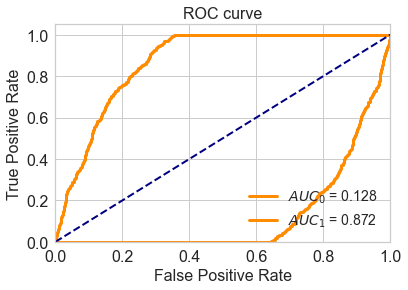

In [212]:
y_score = clf_log_reg_b.predict_proba(X_test_r.T[500].reshape(-1,1))

fpr0, tpr0, _ = roc_curve(y_test_r, y_score[:,0])
roc_auc0 = auc(fpr0, tpr0)

fpr1, tpr1, _ = roc_curve(y_test_r, y_score[:,1])
roc_auc1 = auc(fpr1, tpr1)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr1, tpr1, color='darkorange', lw=3, label='$AUC_1$ = %.3f' % (roc_auc1))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [213]:
import scikitplot as skplt

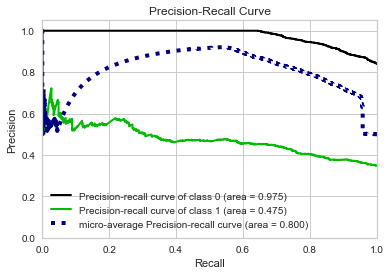

In [214]:
skplt.metrics.plot_precision_recall(y_test, y_score)
plt.show()

In [67]:
precision, recall, thresholds = precision_recall_curve(y_test_r, y_score[:,1])

In [68]:
prc_auc = auc(recall, precision)
prc_auc

0.1262997268430882

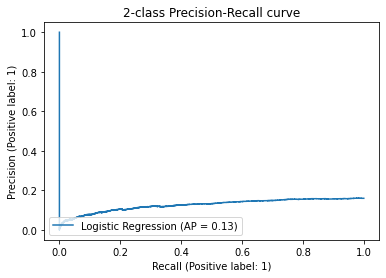

In [69]:
display = PrecisionRecallDisplay.from_predictions(y_test_r, y_score[:,1], name="Logistic Regression")
_ = display.ax_.set_title("2-class Precision-Recall curve")

# Support Vector Machine

#### Linear SVM

In [242]:
from sklearn.svm import LinearSVC
from sklearn import svm, datasets

In [243]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [1,0.1, 0.01, 0.001,'scale','auto']}
n_jobs = -1
svc = svm.SVC(kernel = 'linear')
clf = GridSearchCV(svc, parameters, cv=5, scoring = 'recall')
clf.fit(X_train, y_train)
SVM_l = clf.best_estimator_
SVM_l

SVC(C=0.1, gamma=1, kernel='linear')

In [244]:
SVM_l.fit(X_train, y_train)

y_pred = SVM_l.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9826942653545979
F1-score [0.98977751 0.94364641]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2476
           1       0.98      0.91      0.94       471

    accuracy                           0.98      2947
   macro avg       0.98      0.95      0.97      2947
weighted avg       0.98      0.98      0.98      2947



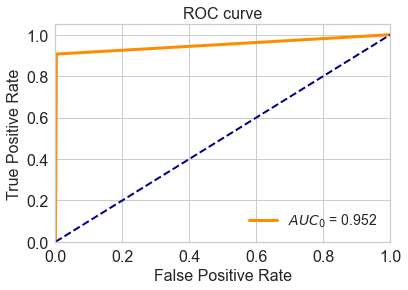

In [40]:
y_score = SVM_l.predict(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score)
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [41]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

In [42]:
prc_auc = auc(recall, precision)
prc_auc

0.9526915732259345

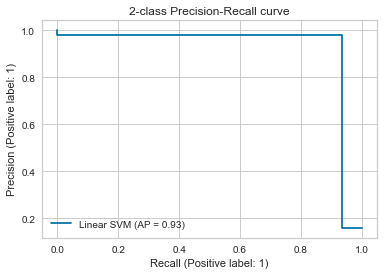

In [246]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_score, name="Linear SVM")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [44]:
X_train.iloc[:,30]

0      -0.224848
1      -0.090963
2      -0.074507
3      -0.155320
4      -0.272505
          ...   
7347    0.099141
7348   -0.057240
7349   -0.023053
7350    0.201032
7351    0.391569
Name: tBodyAcc-arCoeff()-Y,2, Length: 7352, dtype: float64

In [50]:
best = ['tBodyAcc-entropy()-Y','tBodyAcc-arCoeff()-Y,2']
cor = X_train.corr()
cor_target = abs(cor["tBodyAcc-mean()-X"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

tBodyAcc-std()-X                  0.824226
tBodyAcc-std()-Y                  0.878742
tBodyAcc-std()-Z                  0.808811
tBodyAcc-mad()-X                  0.819094
tBodyAcc-mad()-Y                  0.875782
                                    ...   
fBodyBodyGyroJerkMag-min()        0.607210
fBodyBodyGyroJerkMag-sma()        0.746412
fBodyBodyGyroJerkMag-iqr()        0.738319
fBodyBodyGyroJerkMag-entropy()    0.892934
angle(Y,gravityMean)              0.536131
Name: tBodyAcc-entropy()-Y, Length: 359, dtype: float64

C:\Users\Cosimo\anaconda3\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


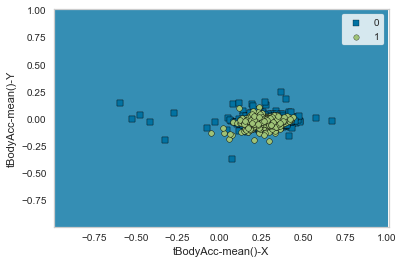

<AxesSubplot:xlabel='tBodyAcc-mean()-X', ylabel='tBodyAcc-mean()-Y'>

In [54]:
from yellowbrick.contrib.classifier import DecisionViz
activities = ['0','1']
viz = DecisionViz(
    svm.SVC(C=0.1, gamma=1, kernel='linear'), title="Linear SVM",
    features=['tBodyAcc-mean()-X','tBodyAcc-mean()-Y'], classes=activities
)
viz.fit(X_train, y_train)
viz.draw(X_test, y_test)
viz.show()

C:\Users\Cosimo\AppData\Local\Temp/ipykernel_10596/3762550637.py:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=ListedColormap([color0, color1]))
C:\Users\Cosimo\AppData\Local\Temp/ipykernel_10596/3762550637.py:44: UserWarning: No contour levels were found within the data range.
  plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],


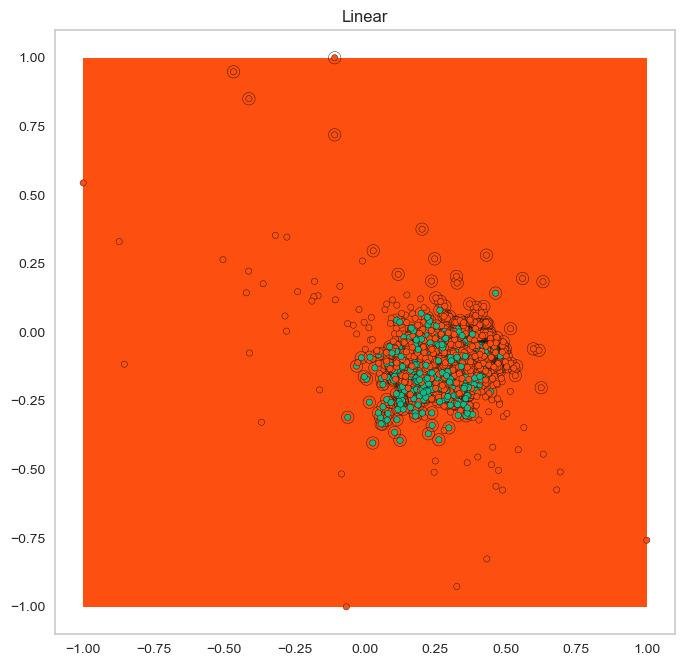

In [93]:
from matplotlib.colors import ListedColormap

color0 = '#FD4F0F'
color1 = '#15B985'
colordark0 = '#882501'
colordark1 = '#448D76'

X = X_train[['tBodyAcc-mean()-X','tBodyAcc-mean()-Z']].values
y = y_train
X_test = X_test[['tBodyAcc-mean()-X','tBodyAcc-mean()-Z']].values
y_test = y_test

n_sample = len(X)


# fit the model
SVM_l.fit(X, y)
    
decision_function = SVM_l.decision_function(X)
support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
support_vectors = X[support_vector_indices]

plt.figure(figsize =(8,8),dpi=100)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=ListedColormap([color0, color1]),
                edgecolor='k', s=20)

# Circle out the test data
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=80, facecolors='none',
                zorder=5, edgecolor='k')

plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = SVM_l.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=ListedColormap([color0, color1]))
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

plt.title('Linear')
plt.show()

In [35]:
feature_names = np.array( X_train.columns)
feature_names[20:24]

array(['tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X',
       'tBodyAcc-entropy()-Y'], dtype=object)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

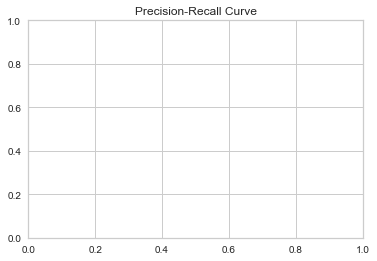

In [245]:
skplt.metrics.plot_precision_recall(y_test, y_score)
plt.show()

#### Test Linear svm with oversampling

In [215]:
from imblearn.over_sampling import RandomOverSampler

In [216]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 6279, 1: 6279})


In [217]:
from sklearn.svm import LinearSVC
from sklearn import svm, datasets

In [219]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [1,0.1, 0.01, 0.001,'scale','auto']}
n_jobs = -1
svc = svm.SVC(kernel = 'linear')
clf = GridSearchCV(svc, parameters, cv=5, scoring = 'recall')
clf.fit(X_res, y_res)
SVM_l = clf.best_estimator_
SVM_l

SVC(C=0.1, gamma=1, kernel='linear')

In [221]:
SVM_l.fit(X_res, y_res)

y_pred = SVM_l.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9864268747879199
F1-score [0.99195818 0.95652174]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2476
           1       0.98      0.93      0.96       471

    accuracy                           0.99      2947
   macro avg       0.98      0.97      0.97      2947
weighted avg       0.99      0.99      0.99      2947



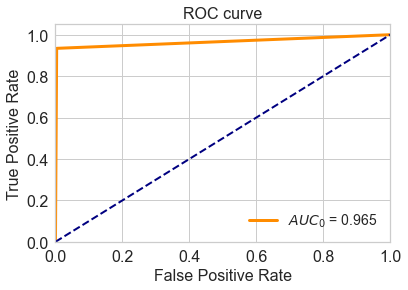

In [222]:
y_score = SVM_l.predict(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score)
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_score)
plt.show()

C:\Users\Cosimo\anaconda3\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


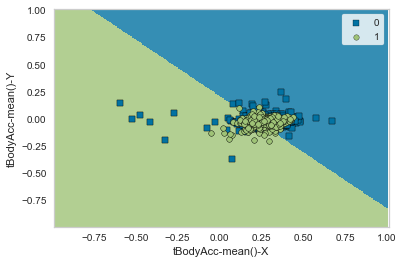

<AxesSubplot:xlabel='tBodyAcc-mean()-X', ylabel='tBodyAcc-mean()-Y'>

In [223]:
from yellowbrick.contrib.classifier import DecisionViz
activities = ['0','1']
viz = DecisionViz(
    SVM_l, title="Linear SVM",
    features=['tBodyAcc-mean()-X','tBodyAcc-mean()-Y'], classes=activities
)
viz.fit(X_res, y_res)
viz.draw(X_test, y_test)
viz.show()

#### Sigmoid

In [41]:
from sklearn.svm import SVC

In [42]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [1,0.1, 0.01, 0.001,'scale','auto']}
n_jobs = -1
svc = svm.SVC(kernel = 'sigmoid')
clf = GridSearchCV(svc, parameters, cv=5, scoring = 'recall')
clf.fit(X_train, y_train)
SVM_s = clf.best_estimator_
SVM_s

SVC(C=100, gamma=0.001, kernel='sigmoid')

In [55]:
SVM_s.fit(X_train, y_train)

y_pred = SVM_l.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

C:\Users\Cosimo\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


ValueError: X has 561 features, but SVC is expecting 2 features as input.

In [ ]:
y_score = SVM_s.predict(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score)
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

In [ ]:
prc_auc = auc(recall, precision)
prc_auc

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_score, name="Logistic Regression")
_ = display.ax_.set_title("2-class Precision-Recall curve")

C:\Users\Cosimo\anaconda3\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


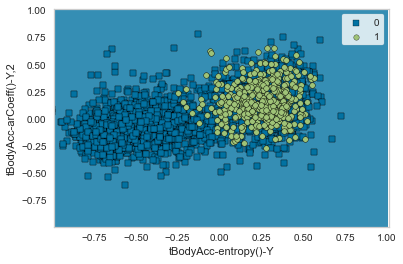

<AxesSubplot:xlabel='tBodyAcc-entropy()-Y', ylabel='tBodyAcc-arCoeff()-Y,2'>

In [56]:
activities = ['0','1']
viz = DecisionViz(
    SVM_s, title="Sigmoid SVM",
    features=['tBodyAcc-entropy()-Y','tBodyAcc-arCoeff()-Y,2'], classes=activities
)
viz.fit(X_train, y_train)
viz.draw(X_test, y_test)
viz.show()

#### Test sigmoid oversampling

In [224]:
from sklearn.svm import SVC

In [226]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [1,0.1, 0.01, 0.001,'scale','auto']}
n_jobs = -1
svc = svm.SVC(kernel = 'sigmoid')
clf = GridSearchCV(svc, parameters, cv=5, scoring = 'recall', n_jobs = -1)
clf.fit(X_res, y_res)
SVM_s = clf.best_estimator_
SVM_s

SVC(C=0.01, gamma=0.001, kernel='sigmoid')

In [227]:
SVM_s.fit(X_res, y_res)

y_pred = SVM_l.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

C:\Users\Cosimo\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


ValueError: X has 561 features, but SVC is expecting 2 features as input.

C:\Users\Cosimo\anaconda3\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


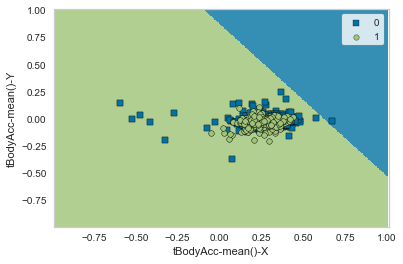

<AxesSubplot:xlabel='tBodyAcc-mean()-X', ylabel='tBodyAcc-mean()-Y'>

In [228]:
activities = ['0','1']
viz = DecisionViz(
    SVM_s, title="Sigmoid SVM",
    features=['tBodyAcc-mean()-X','tBodyAcc-mean()-Y'], classes=activities
)
viz.fit(X_res, y_res)
viz.draw(X_test, y_test)
viz.show()

#### Poly

In [57]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [1,0.1, 0.01, 0.001,'scale','auto']
              }
n_jobs = -1
svc = svm.SVC(kernel = 'poly')
clf = GridSearchCV(svc, parameters, cv=5, scoring = 'recall')
clf.fit(X_train, y_train)
SVM_p = clf.best_estimator_
SVM_p

SVC(C=0.001, gamma=0.1, kernel='poly')

In [58]:
SVM_p.fit(X_train, y_train)

y_pred = SVM_p.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9843909060061079
F1-score [0.99073701 0.95043103]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2476
           1       0.96      0.94      0.95       471

    accuracy                           0.98      2947
   macro avg       0.98      0.96      0.97      2947
weighted avg       0.98      0.98      0.98      2947



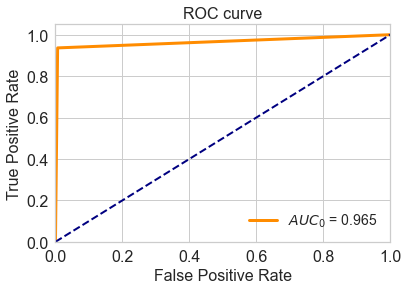

In [59]:
y_score = SVM_p.predict(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score)
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [60]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

In [61]:
prc_auc = auc(recall, precision)
prc_auc

0.9557373177370496

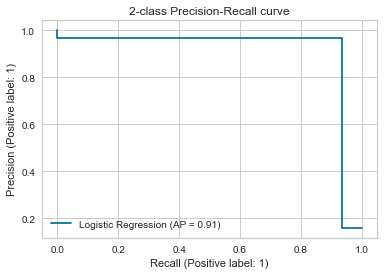

In [62]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_score, name="Logistic Regression")
_ = display.ax_.set_title("2-class Precision-Recall curve")

C:\Users\Cosimo\anaconda3\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


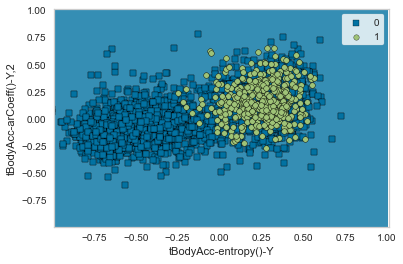

<AxesSubplot:xlabel='tBodyAcc-entropy()-Y', ylabel='tBodyAcc-arCoeff()-Y,2'>

In [63]:
activities = ['0','1']
viz = DecisionViz(
    SVM_p, title="Sigmoid SVM",
    features=['tBodyAcc-entropy()-Y','tBodyAcc-arCoeff()-Y,2'], classes=activities
)
viz.fit(X_train, y_train)
viz.draw(X_test, y_test)
viz.show()

#### Test poly oversampling

In [230]:
from sklearn.svm import SVC

In [231]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [1,0.1, 0.01, 0.001,'scale','auto']}
n_jobs = -1
svc = svm.SVC(kernel = 'poly')
clf = GridSearchCV(svc, parameters, cv=5, scoring = 'recall', n_jobs = -1)
clf.fit(X_res, y_res)
SVM_p = clf.best_estimator_
SVM_p

SVC(C=0.001, gamma=1, kernel='poly')

In [232]:
SVM_p.fit(X_res, y_res)

y_pred = SVM_p.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9881235154394299
F1-score [0.99293072 0.96288441]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2476
           1       0.96      0.96      0.96       471

    accuracy                           0.99      2947
   macro avg       0.98      0.98      0.98      2947
weighted avg       0.99      0.99      0.99      2947



C:\Users\Cosimo\anaconda3\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


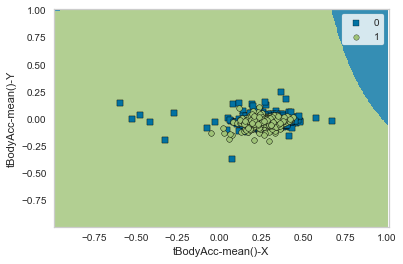

<AxesSubplot:xlabel='tBodyAcc-mean()-X', ylabel='tBodyAcc-mean()-Y'>

In [233]:
activities = ['0','1']
viz = DecisionViz(
    SVM_p, title="Poly SVM",
    features=['tBodyAcc-mean()-X','tBodyAcc-mean()-Y'], classes=activities
)
viz.fit(X_res, y_res)
viz.draw(X_test, y_test)
viz.show()

#### rbf

In [234]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [1,0.1, 0.01, 0.001,'scale','auto']}
n_jobs = -1
svc = svm.SVC(kernel = 'rbf')
clf = GridSearchCV(svc, parameters, cv=5, scoring = 'recall')
clf.fit(X_train, y_train)
SVM_r = clf.best_estimator_
SVM_r

KeyboardInterrupt: 

In [ ]:
SVM_r.fit(X_train, y_train)

y_pred = SVM_r.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

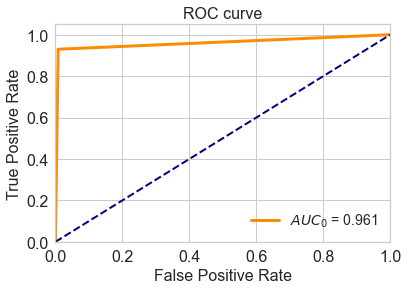

In [66]:
y_score = SVM_r.predict(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score)
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [67]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

In [68]:
prc_auc = auc(recall, precision)
prc_auc

0.948733005880854

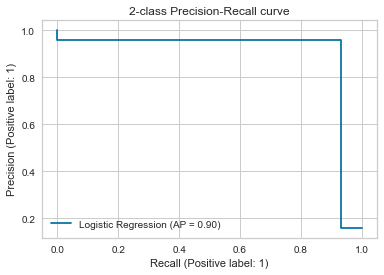

In [69]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_score, name="Logistic Regression")
_ = display.ax_.set_title("2-class Precision-Recall curve")

C:\Users\Cosimo\anaconda3\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


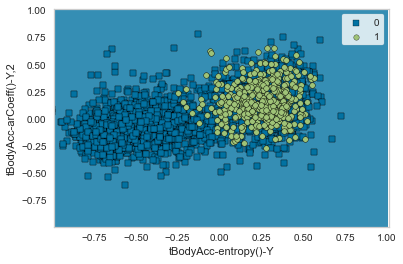

<AxesSubplot:xlabel='tBodyAcc-entropy()-Y', ylabel='tBodyAcc-arCoeff()-Y,2'>

In [70]:
activities = ['0','1']
viz = DecisionViz(
    SVM_r, title="Sigmoid SVM",
    features=['tBodyAcc-entropy()-Y','tBodyAcc-arCoeff()-Y,2'], classes=activities
)
viz.fit(X_train, y_train)
viz.draw(X_test, y_test)
viz.show()

#### Test rbf oversampling

In [235]:
from sklearn.svm import SVC

In [236]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [1,0.1, 0.01, 0.001,'scale','auto']}
n_jobs = -1
svc = svm.SVC(kernel = 'rbf')
clf = GridSearchCV(svc, parameters, cv=5, scoring = 'recall', n_jobs = -1)
clf.fit(X_res, y_res)
SVM_r = clf.best_estimator_
SVM_r

SVC(C=0.001, gamma=0.01)

In [237]:
SVM_r.fit(X_res, y_res)

y_pred = SVM_r.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6851034950797421
F1-score [0.7693837  0.50374332]
              precision    recall  f1-score   support

           0       1.00      0.63      0.77      2476
           1       0.34      1.00      0.50       471

    accuracy                           0.69      2947
   macro avg       0.67      0.81      0.64      2947
weighted avg       0.89      0.69      0.73      2947



C:\Users\Cosimo\anaconda3\lib\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


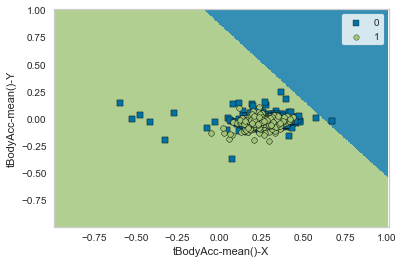

<AxesSubplot:xlabel='tBodyAcc-mean()-X', ylabel='tBodyAcc-mean()-Y'>

In [238]:
activities = ['0','1']
viz = DecisionViz(
    SVM_r, title="rbf SVM",
    features=['tBodyAcc-mean()-X','tBodyAcc-mean()-Y'], classes=activities
)
viz.fit(X_res, y_res)
viz.draw(X_test, y_test)
viz.show()

#### PCA x SVM

In [105]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.pipeline import make_pipeline

In [106]:
attributes = [col for col in X_train.columns]
X_train_svm = df_train[attributes].values
y_train_svm = df_train['Class']

X_test_svm = df_test[attributes].values
y_test_svm = df_test['Class']

attributes

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

#### Linear

In [107]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
svc = svm.SVC(kernel = 'linear')

In [108]:
clf = make_pipeline(PCA(n_components=19), GridSearchCV(svc, parameters, cv=5, scoring = 'recall'))
clf.fit(X_train_svm, y_train_svm)
pred_test = clf.predict(X_test_svm)

In [109]:
print('Accuracy %s' % accuracy_score(y_test_svm, pred_test))
print('F1-score %s' % f1_score(y_test_svm, pred_test, average=None))
print(classification_report(y_test_svm, pred_test))

Accuracy 0.9613165931455717
F1-score [0.97738992 0.86619718]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2476
           1       0.97      0.78      0.87       471

    accuracy                           0.96      2947
   macro avg       0.96      0.89      0.92      2947
weighted avg       0.96      0.96      0.96      2947



In [110]:
SVM_l_pca = clf[1].best_estimator_
SVM_l_pca

SVC(C=0.01, kernel='linear')

In [119]:
X = X_train[['tBodyAcc-mean()-X','tBodyAcc-mean()-Z']].values
X_train_svm[:,0:2]

array([[ 0.28858451, -0.02029417],
       [ 0.27841883, -0.01641057],
       [ 0.27965306, -0.01946716],
       ...,
       [ 0.27338737, -0.01701062],
       [ 0.28965416, -0.01884304],
       [ 0.35150347, -0.01242312]])

C:\Users\Cosimo\AppData\Local\Temp/ipykernel_10596/1504851086.py:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=ListedColormap([color0, color1]))
C:\Users\Cosimo\AppData\Local\Temp/ipykernel_10596/1504851086.py:44: UserWarning: No contour levels were found within the data range.
  plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],


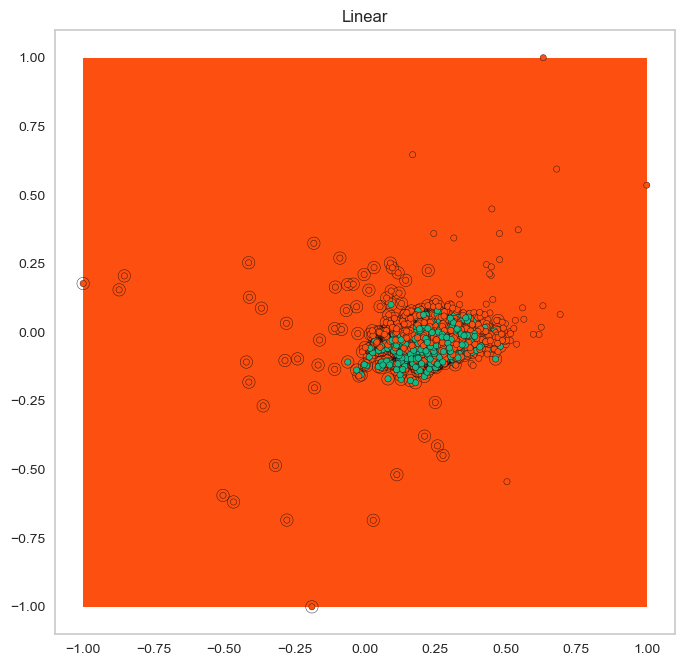

In [120]:
from matplotlib.colors import ListedColormap

color0 = '#FD4F0F'
color1 = '#15B985'
colordark0 = '#882501'
colordark1 = '#448D76'

X = X_train_svm[:,0:2]
y = y_train
X_test = X_test_svm[:,0:2]
y_test = y_test

n_sample = len(X)


# fit the model
SVM_l.fit(X, y)
    
decision_function = SVM_l.decision_function(X)
support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
support_vectors = X[support_vector_indices]

plt.figure(figsize =(8,8),dpi=100)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=ListedColormap([color0, color1]),
                edgecolor='k', s=20)

# Circle out the test data
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=80, facecolors='none',
                zorder=5, edgecolor='k')

plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = SVM_l.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=ListedColormap([color0, color1]))
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

plt.title('Linear')
plt.show()

#### Sigmoid

In [61]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [1,0.1, 0.01, 0.001,'scale','auto']}
svc = svm.SVC(kernel = 'sigmoid')

In [62]:
clf = make_pipeline(KernelPCA(kernel = 'sigmoid', n_components=19), GridSearchCV(svc, parameters, cv=5, scoring = 'recall'))
clf.fit(X_train_svm, y_train_svm)
pred_test = clf.predict(X_test_svm)

In [63]:
print('Accuracy %s' % accuracy_score(y_test_svm, pred_test))
print('F1-score %s' % f1_score(y_test_svm, pred_test, average=None))
print(classification_report(y_test_svm, pred_test))

Accuracy 0.9253478113335596
F1-score [0.95653892 0.73557692]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2476
           1       0.85      0.65      0.74       471

    accuracy                           0.93      2947
   macro avg       0.89      0.81      0.85      2947
weighted avg       0.92      0.93      0.92      2947



In [64]:
SVM_s_pca = clf[1].best_estimator_
SVM_s_pca

SVC(C=100, gamma=1, kernel='sigmoid')

#### Poly

In [65]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [1,0.1, 0.01, 0.001,'scale','auto']}
svc = svm.SVC(kernel = 'poly')

In [66]:
clf = make_pipeline(KernelPCA(kernel = 'poly', n_components=19), GridSearchCV(svc, parameters, cv=5, scoring = 'recall'))
clf.fit(X_train_svm, y_train_svm)
pred_test = clf.predict(X_test_svm)

In [67]:
print('Accuracy %s' % accuracy_score(y_test_svm, pred_test))
print('F1-score %s' % f1_score(y_test_svm, pred_test, average=None))
print(classification_report(y_test_svm, pred_test))

Accuracy 0.9555480149304377
F1-score [0.97325985 0.86834171]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2476
           1       0.82      0.92      0.87       471

    accuracy                           0.96      2947
   macro avg       0.90      0.94      0.92      2947
weighted avg       0.96      0.96      0.96      2947



In [68]:
SVM_p_pca = clf[1].best_estimator_
SVM_p_pca

SVC(C=100, gamma=1, kernel='poly')

#### Rbf

In [69]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [1,0.1, 0.01, 0.001,'scale','auto']}
svc = svm.SVC(kernel = 'rbf')

In [70]:
clf = make_pipeline(KernelPCA(kernel = 'rbf', n_components=19),  GridSearchCV(svc, parameters, cv=5, scoring = 'recall'))
clf.fit(X_train_svm, y_train_svm)
pred_test = clf.predict(X_test_svm)

In [71]:
print('Accuracy %s' % accuracy_score(y_test_svm, pred_test))
print('F1-score %s' % f1_score(y_test_svm, pred_test, average=None))
print(classification_report(y_test_svm, pred_test))

Accuracy 0.9592806243637597
F1-score [0.97569866 0.87447699]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2476
           1       0.86      0.89      0.87       471

    accuracy                           0.96      2947
   macro avg       0.92      0.93      0.93      2947
weighted avg       0.96      0.96      0.96      2947



In [72]:
SVM_r_pca = clf[1].best_estimator_
SVM_r_pca

SVC(C=1)

# Neural Networks

#### Normalization

In [15]:
 from sklearn.preprocessing import StandardScaler 

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Single perceptron

In [116]:
from sklearn.linear_model import Perceptron

In [30]:
ppn = Perceptron(max_iter=150, tol=0.001, eta0=0.01, random_state=0)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9843909060061079


#### Keras Deep Neural Networks

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score 

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=0) # split 80-20

In [21]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

In [22]:
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [37]:
model1 = build_model()

history1 = model1.fit(X_train, y_train, epochs=100, batch_size=10).history

Epoch 1/100
589/589 [==============================] - 3s 3ms/step - loss: 0.0563 - accuracy: 0.9803
Epoch 2/100
589/589 [==============================] - 2s 3ms/step - loss: 0.0156 - accuracy: 0.9947
Epoch 3/100
589/589 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 0.9981
Epoch 4/100
589/589 [==============================] - 2s 3ms/step - loss: 3.4045e-04 - accuracy: 1.0000
Epoch 5/100
589/589 [==============================] - 2s 3ms/step - loss: 1.0437e-04 - accuracy: 1.0000: 0s - loss: 1.0216e
Epoch 6/100
589/589 [==============================] - 1s 2ms/step - loss: 5.6822e-05 - accuracy: 1.0000
Epoch 7/100
589/589 [==============================] - 1s 2ms/step - loss: 3.4584e-05 - accuracy: 1.0000: 1s - l
Epoch 8/100
589/589 [==============================] - 1s 2ms/step - loss: 2.3481e-05 - accuracy: 1.0000
Epoch 9/100
589/589 [==============================] - 2s 3ms/step - loss: 1.5416e-05 - accuracy: 1.0000
Epoch 10/100
589/589 [=================

In [38]:
model2 = build_model()

history2 = model2.fit(X_train, y_train, epochs=100, batch_size=50).history

Epoch 1/100
118/118 [==============================] - 1s 2ms/step - loss: 0.0851 - accuracy: 0.9657
Epoch 2/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9959
Epoch 3/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.9990
Epoch 4/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.9995
Epoch 5/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 6/100
118/118 [==============================] - 0s 2ms/step - loss: 3.9077e-04 - accuracy: 1.0000
Epoch 7/100
118/118 [==============================] - 0s 2ms/step - loss: 2.7269e-04 - accuracy: 1.0000
Epoch 8/100
118/118 [==============================] - 0s 2ms/step - loss: 1.9646e-04 - accuracy: 1.0000
Epoch 9/100
118/118 [==============================] - 0s 2ms/step - loss: 1.4759e-04 - accuracy: 1.0000
Epoch 10/100
118/118 [==============================] - 0s 2ms/step - loss:

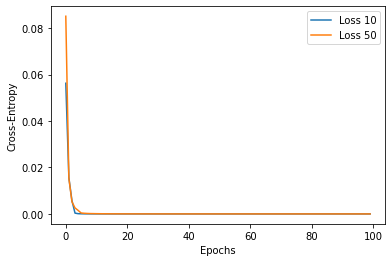

In [39]:
plt.plot(history1['loss'], label='Loss 10')
plt.plot(history2['loss'], label='Loss 50')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [40]:
test_loss_1, test_acc_1 = model1.evaluate(X_test, y_test)
test_loss_2, test_acc_2 = model2.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))

93/93 [==============================] - 0s 1ms/step - loss: 0.1443 - accuracy: 0.9742
Loss 0.213302, Accuracy 0.974211
Loss 0.144300, Accuracy 0.974211


In [41]:
y_pred = model1.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9514760773668137
F1-score [0.97186701 0.82367448]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2476
           1       0.98      0.71      0.82       471

    accuracy                           0.95      2947
   macro avg       0.96      0.85      0.90      2947
weighted avg       0.95      0.95      0.95      2947



In [35]:
model3 = build_model()

history3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000, batch_size=10).history

Epoch 1/1000
589/589 [==============================] - 2s 3ms/step - loss: 0.0608 - accuracy: 0.9794 - val_loss: 0.0499 - val_accuracy: 0.9803
Epoch 2/1000
589/589 [==============================] - 1s 2ms/step - loss: 0.0166 - accuracy: 0.9959 - val_loss: 0.0135 - val_accuracy: 0.9939
Epoch 3/1000
589/589 [==============================] - 1s 2ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0053 - val_accuracy: 0.9986
Epoch 4/1000
589/589 [==============================] - 1s 2ms/step - loss: 0.0143 - accuracy: 0.9966 - val_loss: 0.0052 - val_accuracy: 0.9980
Epoch 5/1000
589/589 [==============================] - 1s 2ms/step - loss: 0.0037 - accuracy: 0.9986 - val_loss: 0.0101 - val_accuracy: 0.9973
Epoch 6/1000
589/589 [==============================] - 1s 2ms/step - loss: 9.9480e-04 - accuracy: 0.9997 - val_loss: 0.0101 - val_accuracy: 0.9966
Epoch 7/1000
589/589 [==============================] - 1s 2ms/step - loss: 9.7595e-05 - accuracy: 1.0000 - val_loss: 0.0028 - val_a

589/589 [==============================] - 1s 2ms/step - loss: 1.6826e-10 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 112/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.7764e-10 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 113/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.8521e-10 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 114/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.9550e-10 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 115/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.8421e-10 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 116/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.6865e-10 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 117/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.7754e-10 - accuracy: 1.0000 - val_l

Epoch 166/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.0525e-10 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 0.9993
Epoch 167/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.0977e-10 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 0.9993
Epoch 168/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.1550e-10 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 0.9993
Epoch 169/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.2035e-10 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 0.9993
Epoch 170/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.2470e-10 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 0.9993
Epoch 171/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.1223e-10 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 0.9993
Epoch 172/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.8090e-10 - accuracy:

Epoch 275/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.1303e-10 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 0.9993
Epoch 276/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.1574e-10 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 0.9993
Epoch 277/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.1800e-10 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 0.9993
Epoch 278/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.2025e-10 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 0.9993
Epoch 279/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.2249e-10 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 0.9993
Epoch 280/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.8193e-10 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 0.9993
Epoch 281/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.8360e-10 - accuracy:

Epoch 384/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.7363e-10 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 385/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.7519e-10 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 386/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.7688e-10 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 387/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.7836e-10 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 388/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.8004e-10 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 389/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.8155e-10 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 390/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.8300e-10 - accuracy:

Epoch 493/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.8289e-10 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 494/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.8389e-10 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 495/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.8508e-10 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 496/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.8610e-10 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 497/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.8709e-10 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 498/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.8814e-10 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 499/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.8931e-10 - accuracy:

Epoch 602/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.8949e-10 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 603/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.9022e-10 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 604/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.9116e-10 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 605/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.9191e-10 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 606/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.9279e-10 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 607/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.9374e-10 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 608/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.9442e-10 - accuracy:

Epoch 711/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.7621e-10 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 712/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.7690e-10 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 713/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.7757e-10 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 714/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.7825e-10 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 715/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.7886e-10 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 716/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.7947e-10 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 717/1000
589/589 [==============================] - 1s 2ms/step - loss: 1.8021e-10 - accuracy:

Epoch 820/1000
589/589 [==============================] - 2s 3ms/step - loss: 2.1337e-10 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 821/1000
589/589 [==============================] - 2s 3ms/step - loss: 2.1410e-10 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 822/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.1457e-10 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 823/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.1513e-10 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 824/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.1564e-10 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 825/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.1616e-10 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 826/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.1685e-10 - accuracy:

Epoch 929/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.2134e-10 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 930/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.2181e-10 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 931/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.2236e-10 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 932/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.2274e-10 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 933/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.2316e-10 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 934/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.2367e-10 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 935/1000
589/589 [==============================] - 1s 2ms/step - loss: 2.2413e-10 - accuracy:

In [42]:
test_loss_3, test_acc_3 = model3.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))

93/93 [==============================] - 0s 2ms/step - loss: 0.2769 - accuracy: 0.9735
Loss 0.213302, Accuracy 0.974211
Loss 0.144300, Accuracy 0.974211
Loss 0.276850, Accuracy 0.973532


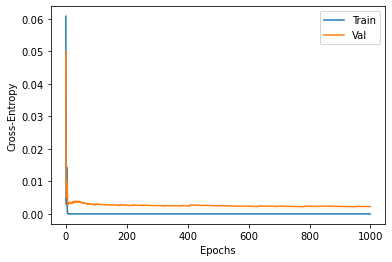

In [43]:
plt.plot(history3['loss'], label='Train')
plt.plot(history3['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

#### Early stopping

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [23]:
es = EarlyStopping(monitor='val_loss', patience=10)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

model4 = build_model()
history4 = model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, 
                      batch_size=10, callbacks=[es,mc]).history

Epoch 1/150
589/589 [==============================] - 2s 3ms/step - loss: 0.0606 - accuracy: 0.9779 - val_loss: 0.0241 - val_accuracy: 0.9884
Epoch 2/150
589/589 [==============================] - 1s 2ms/step - loss: 0.0104 - accuracy: 0.9966 - val_loss: 0.0131 - val_accuracy: 0.9952
Epoch 3/150
589/589 [==============================] - 1s 2ms/step - loss: 0.0110 - accuracy: 0.9961 - val_loss: 0.0837 - val_accuracy: 0.9735
Epoch 4/150
589/589 [==============================] - 1s 2ms/step - loss: 0.0128 - accuracy: 0.9956 - val_loss: 0.0051 - val_accuracy: 0.9986
Epoch 5/150
589/589 [==============================] - 1s 2ms/step - loss: 0.0069 - accuracy: 0.9986 - val_loss: 0.0092 - val_accuracy: 0.9966
Epoch 6/150
589/589 [==============================] - 1s 2ms/step - loss: 0.0067 - accuracy: 0.9981 - val_loss: 0.0050 - val_accuracy: 0.9966
Epoch 7/150
589/589 [==============================] - 1s 2ms/step - loss: 1.0595e-04 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.

In [25]:
test_loss_4, test_acc_4 = model4.evaluate(X_test, y_test)

#print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
#print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
#print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))
print('Loss %f, Accuracy %f' % (test_loss_4, test_acc_4))

93/93 [==============================] - 0s 1ms/step - loss: 0.1500 - accuracy: 0.9746
Loss 0.150022, Accuracy 0.974550


#### L2 regularization

In [26]:
from tensorflow.keras.regularizers import l2

def build_L2_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', input_shape=(n_feature,), kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [27]:
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_loss', save_best_only=True)

L2_model = build_L2_model()
h_L2 = L2_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, 
                    batch_size=10, callbacks=[es,mc]).history

Epoch 1/150
589/589 [==============================] - 3s 3ms/step - loss: 2.6660 - accuracy: 0.8504 - val_loss: 2.0238 - val_accuracy: 0.8688
Epoch 2/150
589/589 [==============================] - 1s 2ms/step - loss: 2.3081 - accuracy: 0.8504 - val_loss: 2.0238 - val_accuracy: 0.8688
Epoch 3/150
589/589 [==============================] - 1s 2ms/step - loss: 2.3081 - accuracy: 0.8504 - val_loss: 2.0238 - val_accuracy: 0.8688
Epoch 4/150
589/589 [==============================] - 1s 2ms/step - loss: 2.3081 - accuracy: 0.8504 - val_loss: 2.0238 - val_accuracy: 0.8688
Epoch 5/150
589/589 [==============================] - 1s 2ms/step - loss: 2.3081 - accuracy: 0.8504 - val_loss: 2.0238 - val_accuracy: 0.8688
Epoch 6/150
589/589 [==============================] - 2s 3ms/step - loss: 2.3081 - accuracy: 0.8504 - val_loss: 2.0238 - val_accuracy: 0.8688
Epoch 7/150
589/589 [==============================] - 2s 3ms/step - loss: 2.3081 - accuracy: 0.8504 - val_loss: 2.0238 - val_accuracy: 0.8688

In [35]:
test_loss_5, test_acc_5 = L2_model.evaluate(X_test, y_test)

#print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
#print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
#print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))
print('Loss %f, Accuracy %f' % (test_loss_5, test_acc_5))

93/93 [==============================] - 0s 2ms/step - loss: 2.4653 - accuracy: 0.8402
Loss 2.465270, Accuracy 0.840176


#### Drop-Out

In [28]:
from tensorflow.keras.layers import Dropout

def build_DROPOUT_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', input_shape=(n_feature,)))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [29]:
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_loss', save_best_only=True)

DROPOUT_model = build_DROPOUT_model()
h_DROPOUT = DROPOUT_model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                              epochs=150, batch_size=10, callbacks=[es,mc]).history

Epoch 1/150
589/589 [==============================] - 2s 3ms/step - loss: 2.2999 - accuracy: 0.8499 - val_loss: 2.0238 - val_accuracy: 0.8688


NotImplementedError: Layer ModuleWrapper has arguments in `__init__` and therefore must override `get_config`.

In [33]:
from tensorflow.keras.models import load_model

best_NOREG_model = load_model('best_model_NOREG.h5')
best_L2_model = load_model('best_model_L2.h5')
#best_DROPOUT_model = load_model('best_model_DROPOUT.h5')

loss_NOREG, acc_NOREG = best_NOREG_model.evaluate(X_test, y_test)
loss_L2, acc_L2 = best_L2_model.evaluate(X_test, y_test)
#loss_DROPOUT, acc_DROPOUT = best_DROPOUT_model.evaluate(X_test, y_test)

93/93 [==============================] - 0s 2ms/step - loss: 2.4653 - accuracy: 0.8402


In [34]:
print('Loss %f, Accuracy %f' % (loss_NOREG, acc_NOREG))
print('Loss %f, Accuracy %f' % (loss_L2, acc_L2))
#print('Loss %f, Accuracy %f' % (loss_DROPOUT, acc_DROPOUT))

Loss 0.108875, Accuracy 0.973193
Loss 2.465270, Accuracy 0.840176


#### Hyperparameter tuning

In [51]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

In [52]:
def build_model(n_layers=2, h_dim=64, activation='relu', optimizer='adam'):
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    
    model.add(Dense(h_dim, activation=activation, input_shape=(n_feature,)))
    for i in range(n_layers-1):
        model.add(Dense(h_dim, activation=activation))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [53]:
n_layers = [1, 2, 3]
h_dim = [32, 64, 128]
activation = ['relu', 'linear','sigmoid','tanh']
optimizer = ['adagrad', 'adam']
params = dict(optimizer=optimizer, n_layers=n_layers, h_dim=h_dim, activation=activation)

In [54]:
model = KerasRegressor(build_fn=build_model)

rnd = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=5, cv=3)
rnd_result = rnd.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0)

C:\Users\Cosimo\AppData\Local\Temp/ipykernel_15332/2545170067.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_model)


62/62 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.9291


In [55]:
print("Best: %f using %s" % (-rnd_result.best_score_, rnd_result.best_params_))
means = rnd_result.cv_results_['mean_test_score']
stds = rnd_result.cv_results_['std_test_score']
params = rnd_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (-mean, stdev, param))

Best: 0.420091 using {'optimizer': 'adam', 'n_layers': 1, 'h_dim': 64, 'activation': 'relu'}
4.085330 (0.820932) with: {'optimizer': 'adam', 'n_layers': 1, 'h_dim': 128, 'activation': 'linear'}
2.308085 (0.077163) with: {'optimizer': 'adam', 'n_layers': 3, 'h_dim': 128, 'activation': 'sigmoid'}
0.420091 (0.144024) with: {'optimizer': 'adam', 'n_layers': 1, 'h_dim': 64, 'activation': 'relu'}
1.509396 (1.049899) with: {'optimizer': 'adagrad', 'n_layers': 1, 'h_dim': 64, 'activation': 'sigmoid'}
0.499754 (0.281864) with: {'optimizer': 'adagrad', 'n_layers': 1, 'h_dim': 128, 'activation': 'linear'}


In [56]:
clf = rnd_result.best_estimator_.model

loss, acc = clf.evaluate(X_test, y_test)
print('Loss %f, Accuracy %f' % (loss, acc))

93/93 [==============================] - 0s 1ms/step - loss: 0.3834 - accuracy: 0.9739
Loss 0.383433, Accuracy 0.973872


#### Keras Deep Neural Networks

In [48]:
from keras.models import Sequential
from keras.layers import Dense

In [49]:
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [50]:
model1 = build_model()

history1 = model1.fit(X_train, y_train, epochs=50, batch_size=10).history

Epoch 1/50
728/728 [==============================] - 2s 2ms/step - loss: 0.0832 - accuracy: 0.9655
Epoch 2/50
728/728 [==============================] - 2s 2ms/step - loss: 0.0316 - accuracy: 0.9882
Epoch 3/50
728/728 [==============================] - 1s 2ms/step - loss: 0.0182 - accuracy: 0.9935
Epoch 4/50
728/728 [==============================] - 2s 2ms/step - loss: 0.0162 - accuracy: 0.9948
Epoch 5/50
728/728 [==============================] - 2s 2ms/step - loss: 0.0150 - accuracy: 0.9941
Epoch 6/50
728/728 [==============================] - 2s 2ms/step - loss: 0.0064 - accuracy: 0.9974
Epoch 7/50
728/728 [==============================] - 2s 2ms/step - loss: 0.0163 - accuracy: 0.9944
Epoch 8/50
728/728 [==============================] - 2s 2ms/step - loss: 0.0075 - accuracy: 0.9970
Epoch 9/50
728/728 [==============================] - 2s 2ms/step - loss: 0.0069 - accuracy: 0.9977
Epoch 10/50
728/728 [==============================] - 2s 2ms/step - loss: 7.9061e-04 - accuracy: 1.

In [51]:
model2 = build_model()

history2 = model2.fit(X_train, y_train, epochs=50, batch_size=50).history

Epoch 1/50
146/146 [==============================] - 1s 4ms/step - loss: 0.1210 - accuracy: 0.9493
Epoch 2/50
146/146 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9868
Epoch 3/50
146/146 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9941
Epoch 4/50
146/146 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9964
Epoch 5/50
146/146 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9955
Epoch 6/50
146/146 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9968
Epoch 7/50
146/146 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9982
Epoch 8/50
146/146 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9966
Epoch 9/50
146/146 [==============================] - 1s 3ms/step - loss: 0.0027 - accuracy: 0.9990
Epoch 10/50
146/146 [==============================] - 0s 3ms/step - loss: 9.0585e-04 - accuracy: 1.

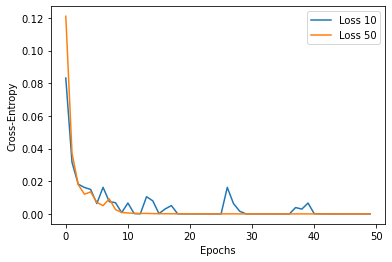

In [52]:
plt.plot(history1['loss'], label='Loss 10')
plt.plot(history2['loss'], label='Loss 50')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [53]:
test_loss_1, test_acc_1 = model1.evaluate(X_test, y_test)
test_loss_2, test_acc_2 = model2.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))

93/93 [==============================] - 0s 2ms/step - loss: 0.1159 - accuracy: 0.9762
Loss 0.193070, Accuracy 0.973193
Loss 0.115937, Accuracy 0.976247


In [54]:
y_pred = model1.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9491007804546997
F1-score [0.9705767  0.81155779]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2476
           1       0.99      0.69      0.81       471

    accuracy                           0.95      2947
   macro avg       0.97      0.84      0.89      2947
weighted avg       0.95      0.95      0.95      2947



#### Hyperparameter tuning

In [61]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

In [62]:
def build_model(n_layers=2, h_dim=64, activation='relu', optimizer='adam'):
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    
    model.add(Dense(h_dim, activation=activation, input_shape=(n_feature,)))
    for i in range(n_layers-1):
        model.add(Dense(h_dim, activation=activation))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [63]:
n_layers = [1, 2, 3]
h_dim = [32, 64, 128]
activation = ['relu', 'tanh']
optimizer = ['adagrad', 'adam']
params = dict(optimizer=optimizer, n_layers=n_layers, h_dim=h_dim, activation=activation)

In [71]:
model = KerasClassifier(model=build_model, batch_size=10, n_layers=1, h_dim=32, activation='tanh')

rnd = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=5, cv=3)
rnd_result = rnd.fit(X_train, y_train, epochs=100, verbose=0)

243/243 [==============================] - 0s 917us/step


In [72]:
print("Best: %f using %s" % (-rnd_result.best_score_, rnd_result.best_params_))
means = rnd_result.cv_results_['mean_test_score']
stds = rnd_result.cv_results_['std_test_score']
params = rnd_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (-mean, stdev, param))

Best: -0.853119 using {'optimizer': 'adagrad', 'n_layers': 2, 'h_dim': 64, 'activation': 'relu'}
-0.853119 (0.000194) with: {'optimizer': 'adagrad', 'n_layers': 2, 'h_dim': 64, 'activation': 'relu'}
-0.853119 (0.000194) with: {'optimizer': 'adam', 'n_layers': 1, 'h_dim': 128, 'activation': 'relu'}
-0.852844 (0.000337) with: {'optimizer': 'adam', 'n_layers': 1, 'h_dim': 32, 'activation': 'relu'}
-0.852982 (0.000194) with: {'optimizer': 'adagrad', 'n_layers': 1, 'h_dim': 128, 'activation': 'tanh'}
-0.853119 (0.000194) with: {'optimizer': 'adam', 'n_layers': 1, 'h_dim': 64, 'activation': 'relu'}


In [84]:
clf = rnd_result.best_estimator_.model
clf

<function __main__.build_model(n_layers=2, h_dim=64, activation='relu', optimizer='adam')>

In [95]:
def build_model_official():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(64, input_dim = n_feature, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [96]:
model_official = build_model_official()

hist1 = model_official.fit(X_train, y_train, epochs=50, batch_size=10).history

Epoch 1/50
728/728 [==============================] - 2s 2ms/step - loss: 2.2814 - accuracy: 0.8515
Epoch 2/50
728/728 [==============================] - 1s 2ms/step - loss: 2.2656 - accuracy: 0.8531
Epoch 3/50
728/728 [==============================] - 1s 2ms/step - loss: 2.2656 - accuracy: 0.8531
Epoch 4/50
728/728 [==============================] - 1s 2ms/step - loss: 2.2656 - accuracy: 0.8531
Epoch 5/50
728/728 [==============================] - 1s 2ms/step - loss: 2.2656 - accuracy: 0.8531
Epoch 6/50
728/728 [==============================] - 1s 2ms/step - loss: 2.2656 - accuracy: 0.8531
Epoch 7/50
728/728 [==============================] - 1s 2ms/step - loss: 2.2656 - accuracy: 0.8531
Epoch 8/50
728/728 [==============================] - 1s 2ms/step - loss: 2.2656 - accuracy: 0.8531
Epoch 9/50
728/728 [==============================] - 1s 1ms/step - loss: 2.2656 - accuracy: 0.8531
Epoch 10/50
728/728 [==============================] - 1s 1ms/step - loss: 2.2656 - accuracy: 0.8531

In [97]:
model_official2 = build_model_official()

hist2 = model_official2.fit(X_train, y_train, epochs=50, batch_size=50).history

Epoch 1/50
146/146 [==============================] - 1s 2ms/step - loss: 2.2571 - accuracy: 0.8530
Epoch 2/50
146/146 [==============================] - 0s 2ms/step - loss: 2.2656 - accuracy: 0.8531
Epoch 3/50
146/146 [==============================] - 0s 2ms/step - loss: 2.2656 - accuracy: 0.8531
Epoch 4/50
146/146 [==============================] - 0s 2ms/step - loss: 2.2656 - accuracy: 0.8531
Epoch 5/50
146/146 [==============================] - 0s 2ms/step - loss: 2.2656 - accuracy: 0.8531
Epoch 6/50
146/146 [==============================] - 0s 2ms/step - loss: 2.2656 - accuracy: 0.8531
Epoch 7/50
146/146 [==============================] - 0s 2ms/step - loss: 2.2656 - accuracy: 0.8531
Epoch 8/50
146/146 [==============================] - 0s 2ms/step - loss: 2.2656 - accuracy: 0.8531
Epoch 9/50
146/146 [==============================] - 0s 2ms/step - loss: 2.2656 - accuracy: 0.8531
Epoch 10/50
146/146 [==============================] - 0s 2ms/step - loss: 2.2656 - accuracy: 0.8531

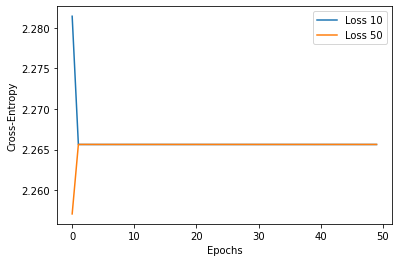

In [98]:
plt.plot(hist1['loss'], label='Loss 10')
plt.plot(hist2['loss'], label='Loss 50')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [99]:
test_loss_1, test_acc_1 = model_official.evaluate(X_test, y_test)
print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))

93/93 [==============================] - 0s 1ms/step - loss: 2.4653 - accuracy: 0.8402
Loss 2.465270, Accuracy 0.840176


In [100]:
test_loss_2, test_acc_2 = model_official2.evaluate(X_test, y_test)
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))

93/93 [==============================] - 0s 1ms/step - loss: 2.4653 - accuracy: 0.8402
Loss 2.465270, Accuracy 0.840176


# Ensemble 

#### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
clf_randomforest = RandomForestClassifier()

In [19]:
# Number of trees in random forest
n_estimators = [100] #Default
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [False, True]

In [20]:
param_grid = {'n_estimators': n_estimators, 
               'max_features': max_features, 
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [False, True]}


In [21]:
# GridSearchCV (takes 10 min)
rf_grid = GridSearchCV(estimator = clf_randomforest, param_grid = param_grid, cv = 10, verbose=2, n_jobs = -1)

In [23]:
rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False, True], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [100]},
             verbose=2)

In [24]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [26]:
clf_rfGrid = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=4, bootstrap=False)
clf_rfGrid.fit(X_train, y_train)
y_pred = clf_rfGrid.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9541907024092298
F1-score [0.97330433 0.83870968]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2476
           1       0.96      0.75      0.84       471

    accuracy                           0.95      2947
   macro avg       0.96      0.87      0.91      2947
weighted avg       0.95      0.95      0.95      2947



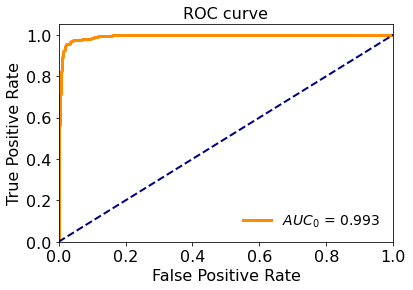

In [32]:
y_score = clf_rfGrid.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [35]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

In [36]:
prc_auc = auc(recall, precision)
prc_auc

0.9655905606811872

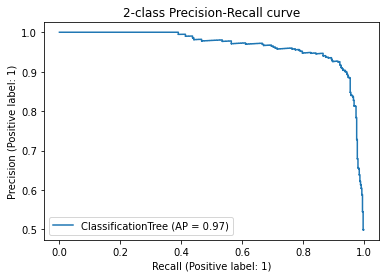

In [38]:
y_score = clf_rfGrid.predict_proba(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score[:,1], name="RandomForest")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [39]:
# RandomizedSearchCV (takes 3 min)
rf_rand = RandomizedSearchCV(estimator = clf_randomforest, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = -1)

In [40]:
rf_rand.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [False, True],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100]},
                   verbose=2)

In [41]:
rf_rand.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': False}

In [42]:
clf_rfRand = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=4, bootstrap=False)
clf_rfRand.fit(X_train, y_train)
y_pred = clf_rfRand.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9545300305395318
F1-score [0.97344431 0.84198113]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2476
           1       0.95      0.76      0.84       471

    accuracy                           0.95      2947
   macro avg       0.95      0.87      0.91      2947
weighted avg       0.95      0.95      0.95      2947



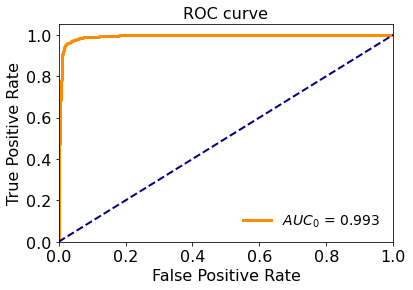

In [43]:
y_score = clf_rfRand.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [44]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

In [45]:
prc_auc = auc(recall, precision)
prc_auc

0.9621788178622488

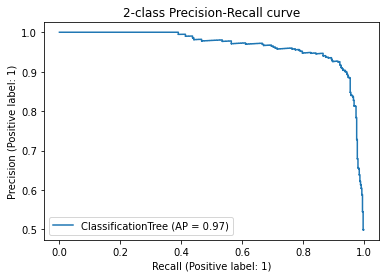

In [46]:
y_score = clf_rfGrid.predict_proba(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score[:,1], name="RandomForest")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [ ]:
nbr_features = 

tree_feature_importances = Randf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(attributes)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

#### Bagging

In [47]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [48]:
# Estimator = None (Decision Tree)
clf_bdt = BaggingClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf_bdt.fit(X_train, y_train)

y_pred = clf_bdt.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9385816084153377
F1-score [0.96405164 0.78928987]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2476
           1       0.87      0.72      0.79       471

    accuracy                           0.94      2947
   macro avg       0.91      0.85      0.88      2947
weighted avg       0.94      0.94      0.94      2947



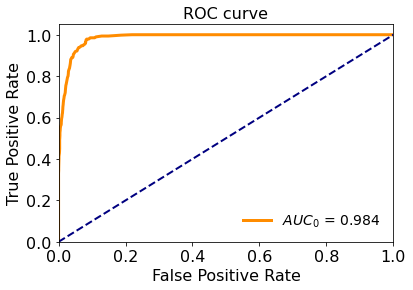

In [49]:
y_score = clf_bdt.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [50]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

In [51]:
prc_auc = auc(recall, precision)
prc_auc

0.9218587573386698

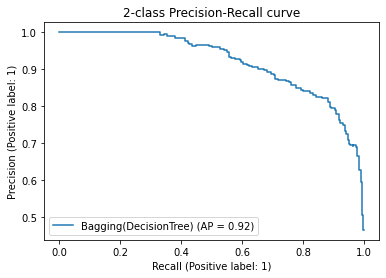

In [52]:
y_score = clf_bdt.predict_proba(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score[:,1], name="Bagging(DecisionTree)")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [54]:
# Estimator = SVC
clf_bsvc = BaggingClassifier(base_estimator=SVC(C=1000), n_estimators=10, random_state=0)
clf_bsvc.fit(X_train, y_train)

y_pred = clf_bsvc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9840515778758059
F1-score [0.99050697 0.95015907]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2476
           1       0.95      0.95      0.95       471

    accuracy                           0.98      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.98      0.98      0.98      2947



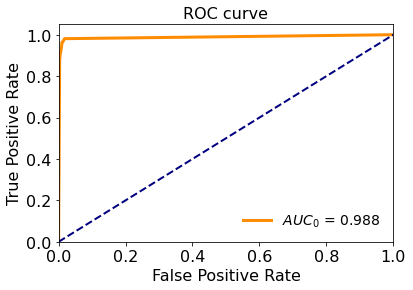

In [55]:
y_score = clf_bsvc.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [56]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

In [57]:
prc_auc = auc(recall, precision)
prc_auc

0.9784011346206406

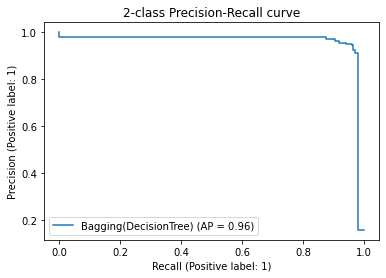

In [58]:
y_score = clf_bsvc.predict_proba(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score[:,1], name="Bagging(DecisionTree)")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [59]:
# Estimator = Random Forest (takes 8 min)
clf_brf = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf_brf.fit(X_train, y_train)

y_pred = clf_brf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9592806243637597
F1-score [0.9759519  0.86725664]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2476
           1       0.91      0.83      0.87       471

    accuracy                           0.96      2947
   macro avg       0.94      0.91      0.92      2947
weighted avg       0.96      0.96      0.96      2947



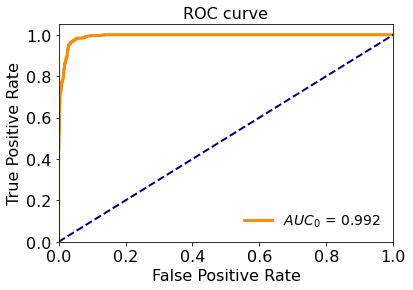

In [60]:
y_score = clf_brf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [61]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

In [62]:
prc_auc = auc(recall, precision)
prc_auc

0.9597645658771805

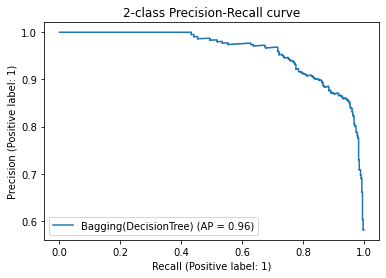

In [63]:
y_score = clf_brf.predict_proba(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score[:,1], name="Bagging(DecisionTree)")
_ = display.ax_.set_title("2-class Precision-Recall curve")

#### Boosting

In [64]:
from sklearn.ensemble import AdaBoostClassifier

In [65]:
# Base estimator = None (Decision tree w/ max_depth=1)
clf_ab = AdaBoostClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf_ab.fit(X_train, y_train)

y_pred = clf_ab.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9660671869697998
F1-score [0.97993579 0.89010989]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2476
           1       0.92      0.86      0.89       471

    accuracy                           0.97      2947
   macro avg       0.95      0.92      0.94      2947
weighted avg       0.97      0.97      0.97      2947



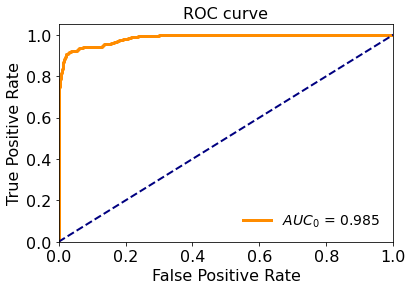

In [66]:
y_score = clf_ab.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [67]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

In [68]:
prc_auc = auc(recall, precision)
prc_auc

0.9517343819431169

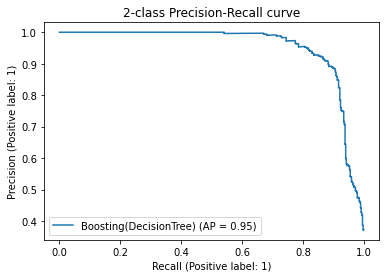

In [69]:
y_score = clf_ab.predict_proba(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score[:,1], name="Boosting(DecisionTree)")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [70]:
# Base estimator = Random Forest
clf_abrf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf_abrf.fit(X_train, y_train)

y_pred = clf_abrf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9494401085850017
F1-score [0.97015822 0.83462819]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2476
           1       0.87      0.80      0.83       471

    accuracy                           0.95      2947
   macro avg       0.92      0.89      0.90      2947
weighted avg       0.95      0.95      0.95      2947



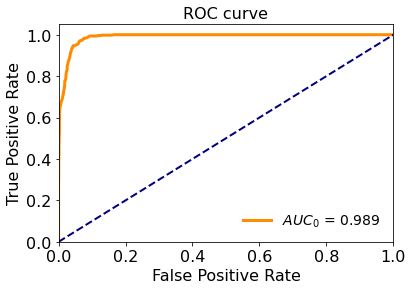

In [71]:
y_score = clf_abrf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [72]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

In [73]:
prc_auc = auc(recall, precision)
prc_auc

0.9427322341587532

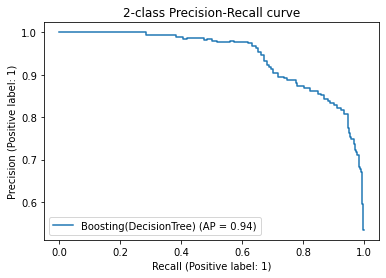

In [74]:
y_score = clf_abrf.predict_proba(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score[:,1], name="Boosting(DecisionTree)")
_ = display.ax_.set_title("2-class Precision-Recall curve")

# Gradient Boosting

In [12]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [14]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]}

In [16]:
#from sklearn.model_selection import GridSearchCV
#cv = GridSearchCV(gbc,parameters,cv=5)

In [24]:
#cv.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [18]:
clf_gbc = GradientBoostingClassifier(n_estimators=150, max_depth=5, learning_rate=0.1)
clf_gbc.fit(X_train, y_train)
y_pred = clf_gbc.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9535120461486257
F1-score [0.97266015 0.84484711]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2476
           1       0.91      0.79      0.84       471

    accuracy                           0.95      2947
   macro avg       0.93      0.89      0.91      2947
weighted avg       0.95      0.95      0.95      2947



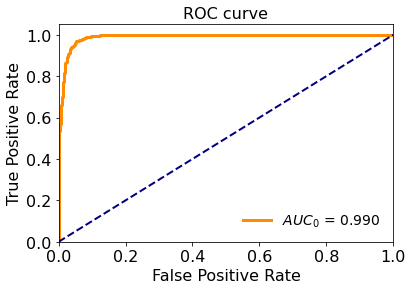

In [19]:
y_score = clf_gbc.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [20]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

In [21]:
prc_auc = auc(recall, precision)
prc_auc

0.9470140941463023

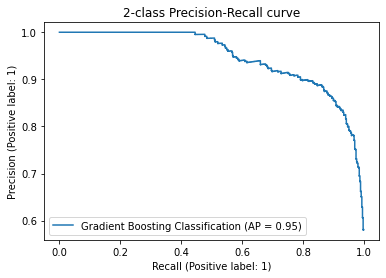

In [23]:
y_score = clf_gbc.predict_proba(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score[:,1], name="Gradient Boosting Classification")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [27]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
gbc = GradientBoostingRegressor()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]}

In [28]:
clf_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=4, random_state=0)
clf_gbr.fit(X_train, y_train)

y_pred = clf_gbr.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.261
MSE: 0.099
MAE: 0.127


#### XGBoost

In [30]:
from xgboost import XGBClassifier

C:\Users\Cosimo\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [31]:
clf_xgb = XGBClassifier(objective='binary:logistic', 
                        n_estimators = 150,
                        booster = 'gbtree',
                    max_depth = 4,
                    learning_rate = 1.0,
                    gamma = 0.0, #Minimum loss reduction required to make a 
                                  # further partition on a leaf node of the tree.
                    reg_lambda = 1, # L2 regularization term on weights
                    tree_method='exact', # Exact means XGBoost considers all 
                                         # candidates from data for tree 
                                        # splitting, but underlying the 
                                         # objective is still interpreted 
                                         # as a Taylor expansion.
                    use_label_encoder=False,
                    random_state=0
                   )
clf_xgb.fit(X_train, y_train)

y_pred = clf_xgb.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

C:\Users\Cosimo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:54:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy 0.9606379368849678
F1-score [0.97677213 0.87111111]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2476
           1       0.91      0.83      0.87       471

    accuracy                           0.96      2947
   macro avg       0.94      0.91      0.92      2947
weighted avg       0.96      0.96      0.96      2947



C:\Users\Cosimo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


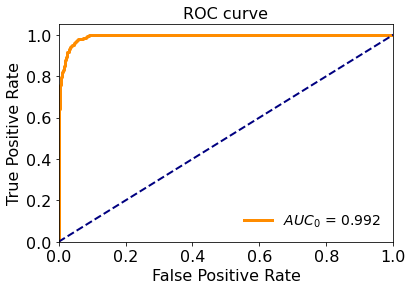

In [32]:
y_score = clf_xgb.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [33]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

In [34]:
prc_auc = auc(recall, precision)
prc_auc

0.9620488538716772

C:\Users\Cosimo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


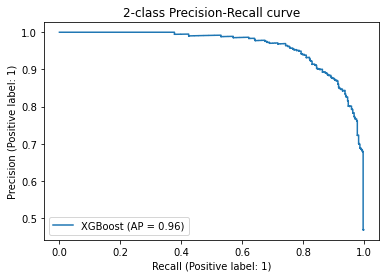

In [35]:
y_score = clf_xgb.predict_proba(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score[:,1], name="XGBoost")
_ = display.ax_.set_title("2-class Precision-Recall curve")

#### LightGBM

In [36]:
from lightgbm import LGBMClassifier

C:\Users\Cosimo\anaconda3\lib\site-packages\dask\dataframe\backends.py:189: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\Cosimo\anaconda3\lib\site-packages\dask\dataframe\backends.py:189: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\Cosimo\anaconda3\lib\site-packages\dask\dataframe\backends.py:189: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [40]:
import re
df_train = df_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df_test = df_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [42]:
df_train['Class'] = 0
df_test['Class'] = 0

df_train.loc[(df_train['Activity']==2), 'Class'] = 1
df_test.loc[(df_test['Activity']==2), 'Class'] = 1

In [43]:
X_train = df_train.drop(['subject','Activity','ActivityName','Class'], axis = 1)
y_train = df_train.Class
X_test = df_test.drop(['subject','Activity','ActivityName','Class'], axis = 1)
y_test = df_test.Class

In [45]:
clf_lgbm = LGBMClassifier(boosting_type='gbdt',  #traditional Gradient Boosting Decision Tree
                     max_depth=4, # no limit
                     num_leaves=31,
                     n_estimators=100,
                          learning_rate = 0.1,
                     subsample_for_bin=200000,
                     objective='binary',
                     reg_alpha=0.0, #L1 regularization term on weights
                     reg_lambda=1, #L2 regularization term on weights
                     random_state=0
                   )
clf_lgbm.fit(X_train, y_train)

y_pred = clf_lgbm.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9677638276213099
F1-score [0.98092752 0.89594743]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2476
           1       0.93      0.87      0.90       471

    accuracy                           0.97      2947
   macro avg       0.95      0.93      0.94      2947
weighted avg       0.97      0.97      0.97      2947



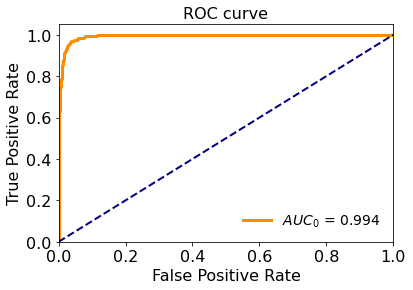

In [46]:
y_score = clf_lgbm.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [47]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

In [48]:
prc_auc = auc(recall, precision)
prc_auc

0.9684401484685553

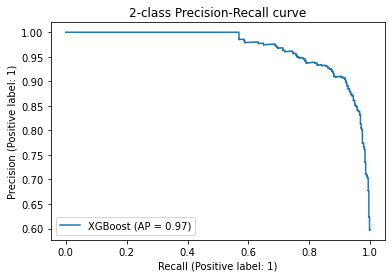

In [49]:
y_score = clf_lgbm.predict_proba(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score[:,1], name="XGBoost")
_ = display.ax_.set_title("2-class Precision-Recall curve")